In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd

import plotly.express as px

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib import cm
from matplotlib import colormaps

import math 
import statistics

from array import array


import pprint
import re


Welcome to JupyROOT 6.30/06


# Input padplane mapping

In [2]:
new_maps = [ 
    'PadPlane/AutoPad-R1-RevA.sch',
    'PadPlane/AutoPad-R2-RevA-Pads.sch',
    'PadPlane/AutoPad-R3-RevA.sch',
]
old_maps = [ 
    'AutoPad-R1-RevA.sch',
    'AutoPad-R2-RevA-Pads.sch',
    'AutoPad-R3-RevA.sch',
]

In [3]:
# Parameters
num_circles = 4  # Number of concentric circles
num_sectors = 12  # Number of radial divisions (sectors)
inner_radius = 1  # Radius of the inner circle (to exclude the center)
rotation_offset = np.pi / num_sectors  # Half the angle of one sector
module_radius = [31.105,40.249,41.153,57.475,58.367,75.911]
colors = ['tomato','c','green']

In [4]:
new_df_centroids, old_df_centroids = [], []
for imap in new_maps:
    new_df_centroids.append(pd.read_csv(f"{imap}.ChannelMapping.csv"))
for imap in old_maps:
    old_df_centroids.append(pd.read_csv(f"{imap}.ChannelMapping.csv"))

In [5]:
def draw_wagonwheel(view):

    # Create the figure and axis
    fig = plt.figure(figsize=(60, 30))  # Adjust figure size (10x5 is a more typical size)
    # Add polar subplots
    ax1 = fig.add_subplot(121, polar=True)  # 1 row, 2 columns, 1st subplot
    ax2 = fig.add_subplot(122, polar=True) 
    #(ax1,ax2) = plt.subplot(111, polar=True)

    # Draw concentric circles
    circle_radii = np.linspace(inner_radius, inner_radius + num_circles - 1, num_circles)
    for radius in module_radius:
        ax1.plot(np.linspace(0, 2 * np.pi, 100), [radius] * 100, color='black')
        ax2.plot(np.linspace(0, 2 * np.pi, 100), [radius] * 100, color='black')

    # Draw radial lines with rotation offset
    angles = np.linspace(0, 2 * np.pi, num_sectors, endpoint=False) + rotation_offset
    for angle in angles:
        ax1.plot([angle, angle], [module_radius[0], module_radius[5]], color='black')
        ax2.plot([angle, angle], [module_radius[0], module_radius[5]], color='black')
    for side in range(0,2):
        #Drawing Pads
        for sector in range(0, 12):
            phi_text = max(new_df_centroids[1]['PadPhi']) - (max(new_df_centroids[1]['PadPhi']) - min(new_df_centroids[1]['PadPhi']))/2 - np.pi/2
            r_text = new_df_centroids[1]['PadR'][8]/10
            for i in range(0, 3):
                angle_max = (max(new_df_centroids[i]['PadPhi']) - np.pi/2)
                sector_size = max(new_df_centroids[i]['PadPhi'])- min(new_df_centroids[i]['PadPhi'])
                if(side==1):
                    phi_shift = np.pi  - (sector + 1) * np.pi/6
                elif(view=='from outside'):
                    phi_shift = (sector + 1) * np.pi/6
                else:
                    phi_shift = np.pi  - (sector + 1) * np.pi/6
                if (view=='sPHENIX coordinate system' and side ==0):    
                    ax1.plot(-(new_df_centroids[i]['PadPhi'] - np.pi/2) + phi_shift, new_df_centroids[i]['PadR']/10, 'o', markersize=1, color = colors[side])
                    ax1.text(-phi_text + phi_shift, r_text, f"{sector}", color="blue", fontsize=34, ha='center')
                    ax1.plot([-angle_max + phi_shift, -angle_max + phi_shift], [module_radius[2 * i], module_radius[2 * i +1]], color = colors[2])
                    ax1.plot([-(angle_max - sector_size) + phi_shift, -(angle_max - sector_size) + phi_shift], [module_radius[2 * i], module_radius[2 * i +1]],color = colors[2])
                else:
                    if(side==0):
                        ax1.plot((new_df_centroids[i]['PadPhi'] - np.pi/2) + phi_shift, new_df_centroids[i]['PadR']/10, 'o', markersize=1, color = colors[side])
                        ax1.text(phi_text + phi_shift, r_text, f"{sector}", color="blue", fontsize=34, ha='center')
                        ax1.plot([angle_max + phi_shift, angle_max + phi_shift], [module_radius[2 * i], module_radius[2 * i +1]], color = colors[2])
                        ax1.plot([(angle_max - sector_size) + phi_shift, (angle_max - sector_size) + phi_shift], [module_radius[2 * i], module_radius[2 * i +1]], color = colors[2])                
                    else:
                        ax2.plot((new_df_centroids[i]['PadPhi'] - np.pi/2) + phi_shift, new_df_centroids[i]['PadR']/10, 'o', markersize=1, color = colors[side])
                        ax2.text(phi_text + phi_shift, r_text, f"{sector}", color="blue", fontsize=34, ha='center')
                        ax2.plot([angle_max + phi_shift, angle_max + phi_shift], [module_radius[2 * i], module_radius[2 * i +1]], color = colors[2])
                        ax2.plot([(angle_max - sector_size) + phi_shift, (angle_max - sector_size) + phi_shift], [module_radius[2 * i], module_radius[2 * i +1]], color = colors[2])                   

        if(side==0):
            ax1.text(np.pi / 2, 0, f"SOUTH\n{view}", color="red", fontsize=24, ha='center')      
        else:
            ax2.text(np.pi / 2, 0, f"NORTH\n{view}", color="blue", fontsize=24, ha='center')   

        # Formatting
        ax1.set_ylim(0, module_radius[5]+5)
        ax1.axis('off')  # Turn off the axis
        ax2.set_ylim(0, module_radius[5]+5)
        ax2.axis('off')  # Turn off the axis
    # Show the plot
    plt.show()
    if(view=='from outside'):
        fig.savefig("pics/WagonWheel_side_FromOutside.pdf", bbox_inches='tight')
    else:
        fig.savefig("pics/WagonWheel_side_sPHENIX.pdf", bbox_inches='tight')

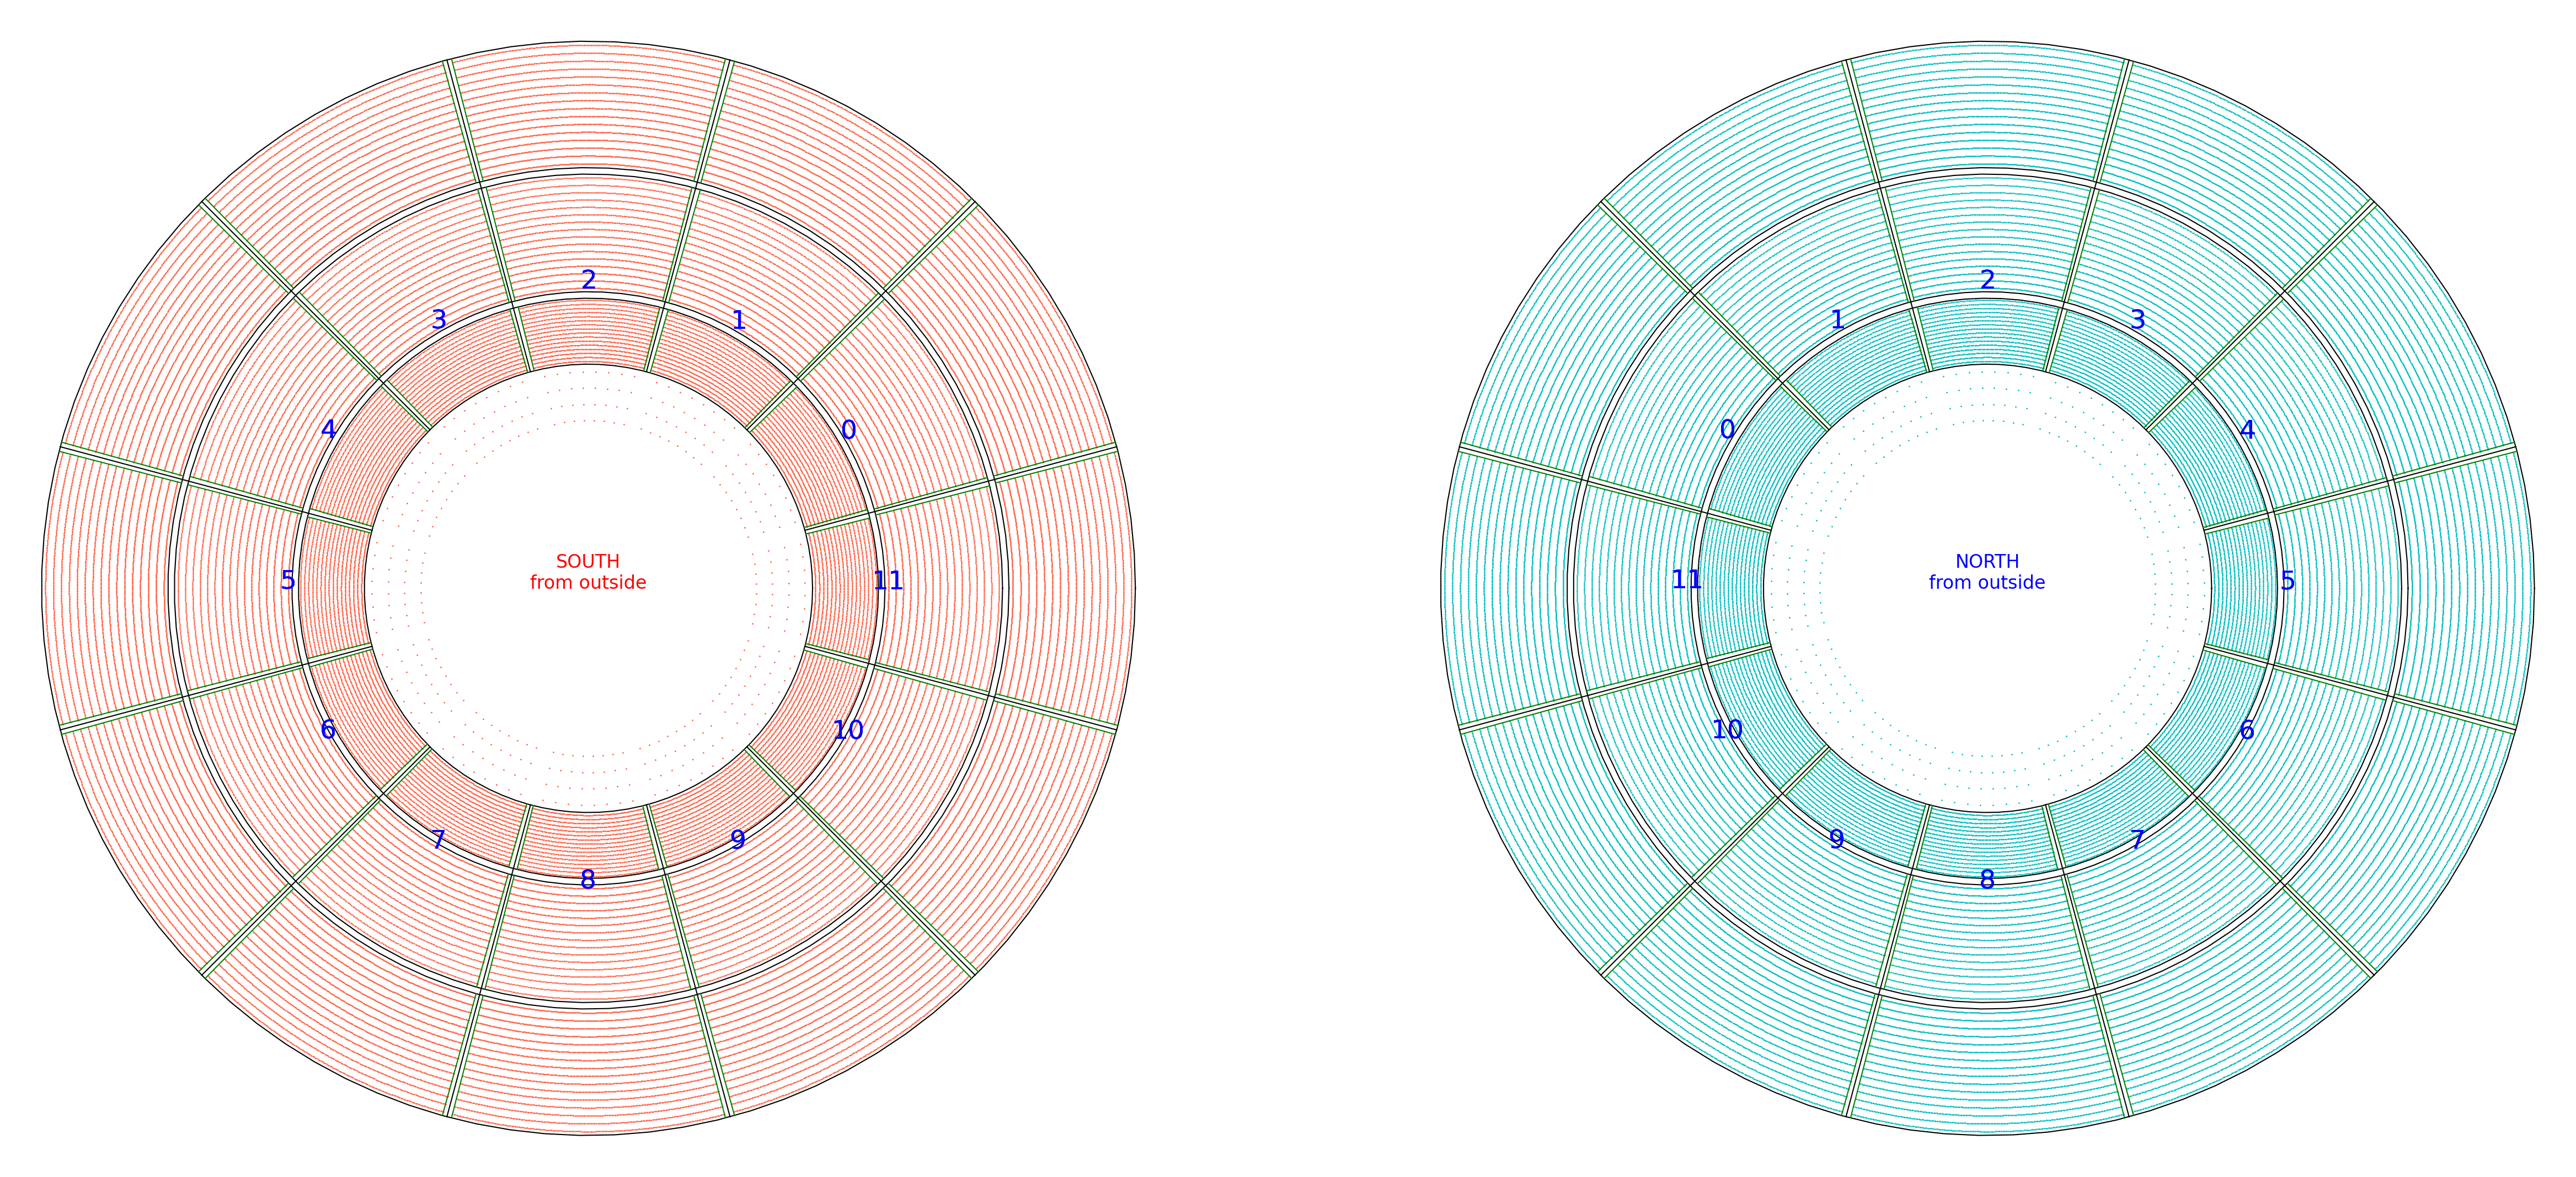

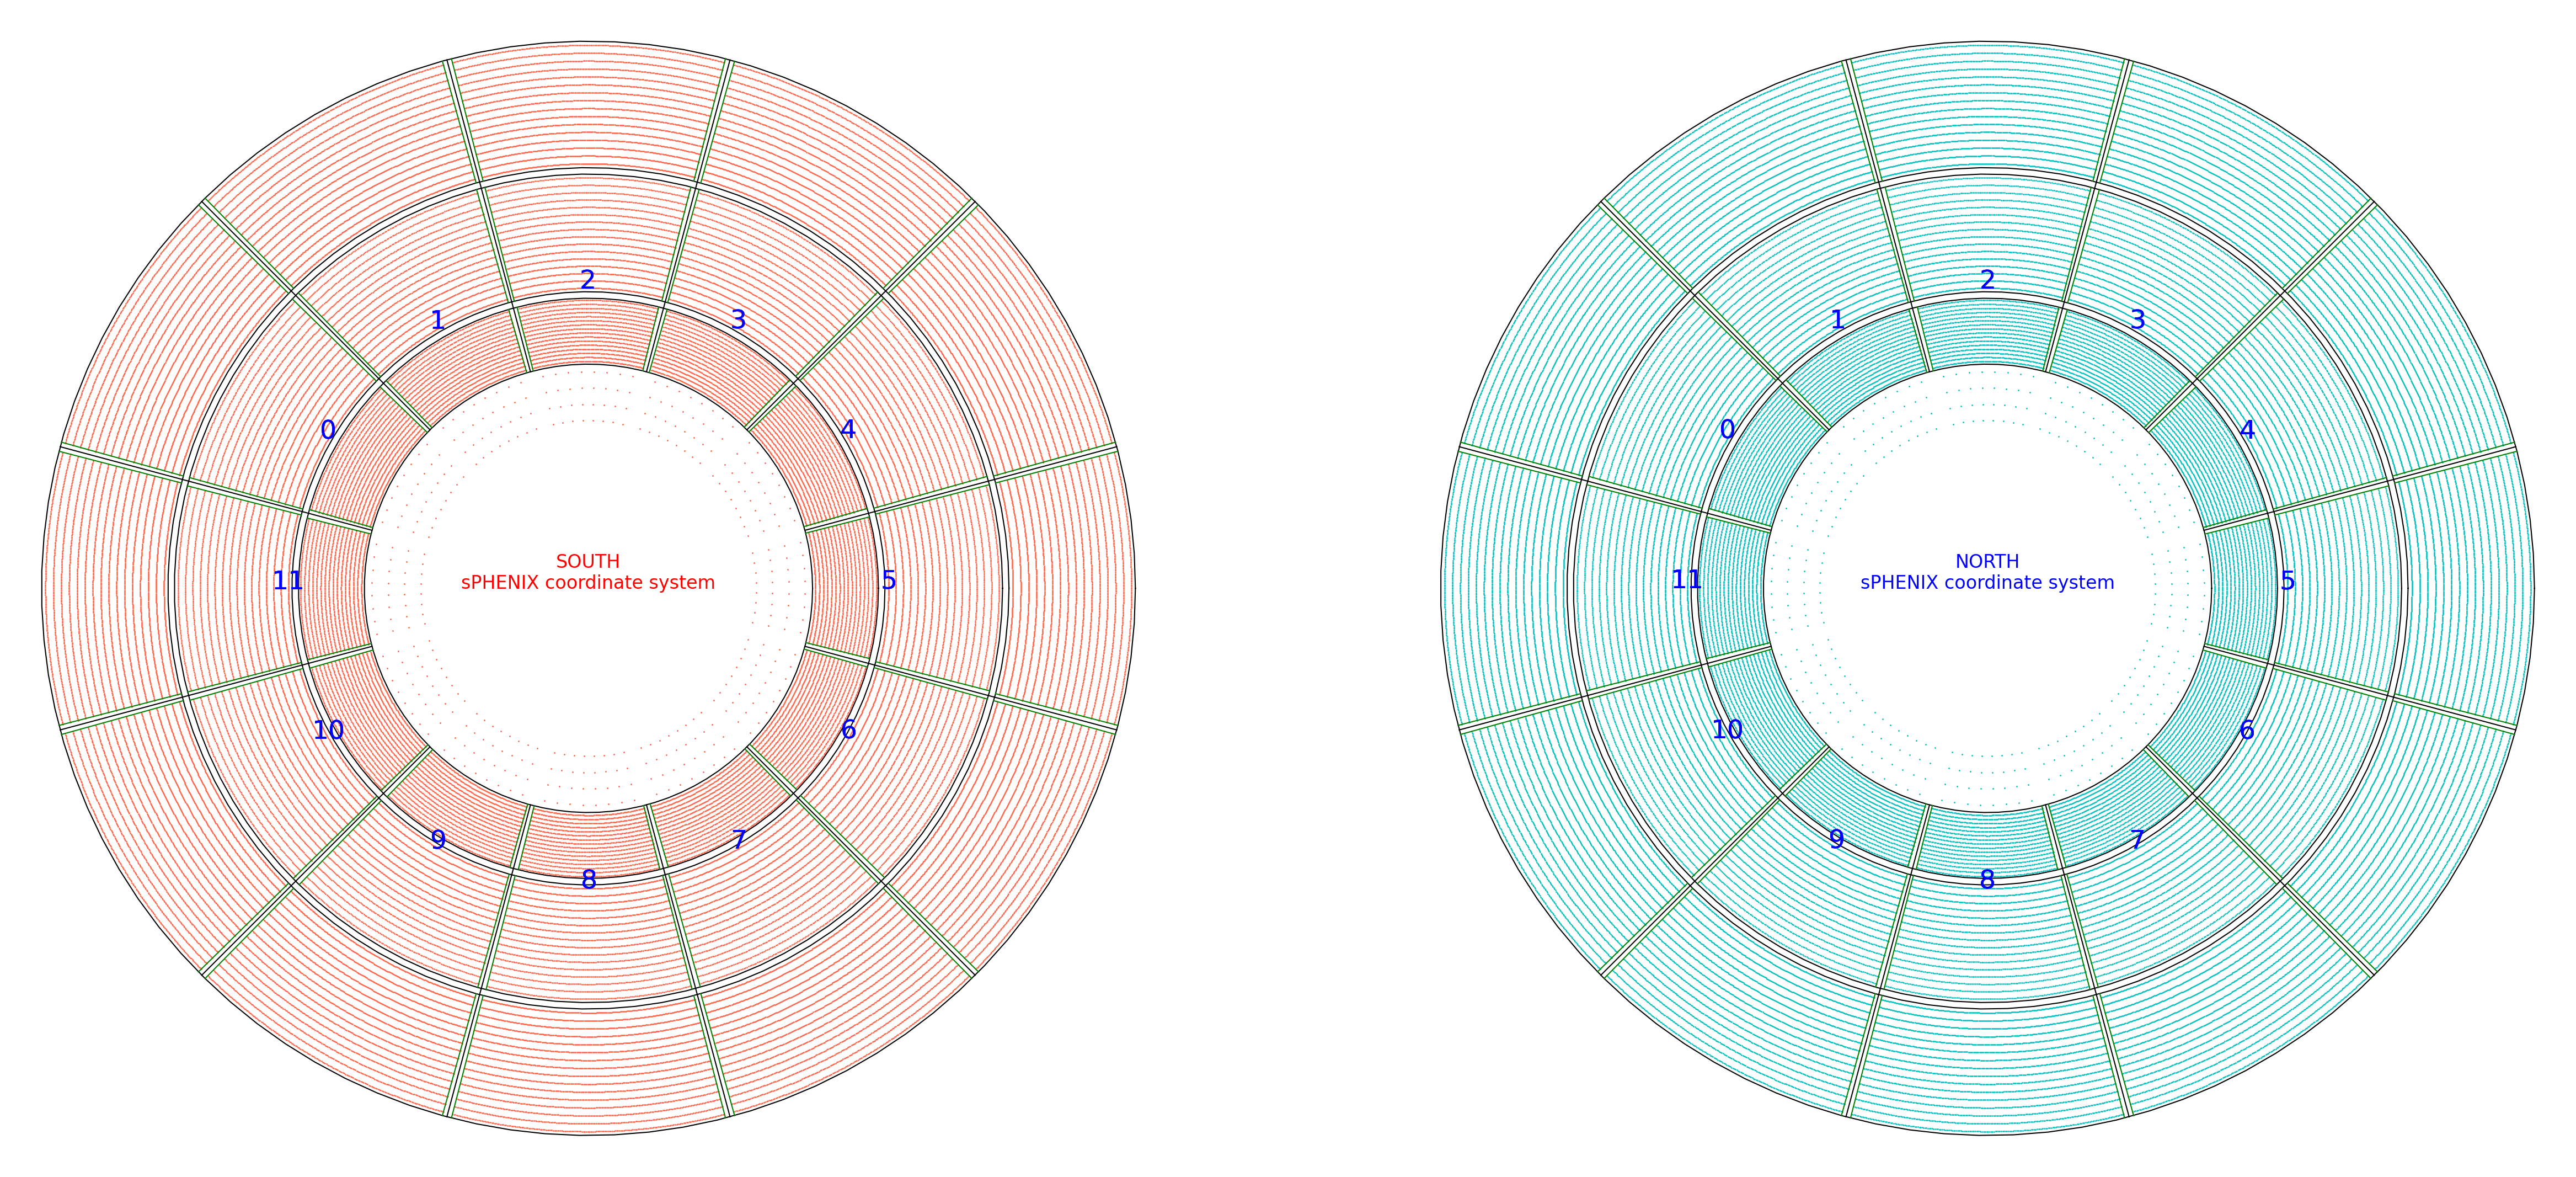

In [6]:
view={'sPHENIX coordinate system', 'from outside'} #0 - From outside, 1 - sPHENIX coordinate system (z axis is from NORTH to SOUTH)
for v in view:
        draw_wagonwheel(v)

In [7]:
Z0 = (new_df_centroids[0]['PadPhi'].to_numpy() - old_df_centroids[0]['PadPhi'].to_numpy() - math.pi/2.)*1.e3*new_df_centroids[0]['PadR']
Z1 = (new_df_centroids[1]['PadPhi'].to_numpy() - old_df_centroids[1]['PadPhi'].to_numpy() - math.pi/2.)*1.e3*new_df_centroids[1]['PadR']
Z2 = (new_df_centroids[2]['PadPhi'].to_numpy() - old_df_centroids[2]['PadPhi'].to_numpy() - math.pi/2.)*1.e3*new_df_centroids[2]['PadR']
print("module 0:", Z0[-5:].tolist(),"\nmodule 1:",Z1[-5:].tolist(),"\nmodule 2:",Z2[-5:].tolist())

module 0: [-16.201151885141677, -15.787614469587728, -16.666137081127935, -15.942775693349091, -386.8875113056071] 
module 1: [15.646001073199107, 15.893312922783636, 16.1433886136999, 15.19421753944455, -260.1929458708448] 
module 2: [9.61969832643763, 9.502615973332698, 9.780030698456494, 9.415433109120631, -83.71991240297223]


In [8]:
def Draw_diff_between_old_and_new_maps(imodule, scheme_name = "Paired"):

    X = new_df_centroids[imodule]['PadX'].to_numpy()
    Y = new_df_centroids[imodule]['PadY'].to_numpy()
    Z = (new_df_centroids[imodule]['PadPhi'].to_numpy() - old_df_centroids[imodule]['PadPhi'].to_numpy() - math.pi/2.)*1.e3*new_df_centroids[imodule]['PadR']
    
    # Create figure
    fig, ax = plt.subplots(figsize=(30, 30))
    
    # Choose twilight
    cmap = colormaps.get_cmap(scheme_name)
    
    # Normalize Z values to colormap range
    norm = plt.Normalize(vmin=np.nanmin(Z), vmax=np.nanmax(Z))
    colors = cmap(norm(Z))
    
    # Scatter plot with colors based on Z values
    scatter = ax.scatter(X, Y, c=Z, cmap=cmap)
    
    # Add colorbar
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Z values')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter plot with Z-value color mapping')
    plt.show()

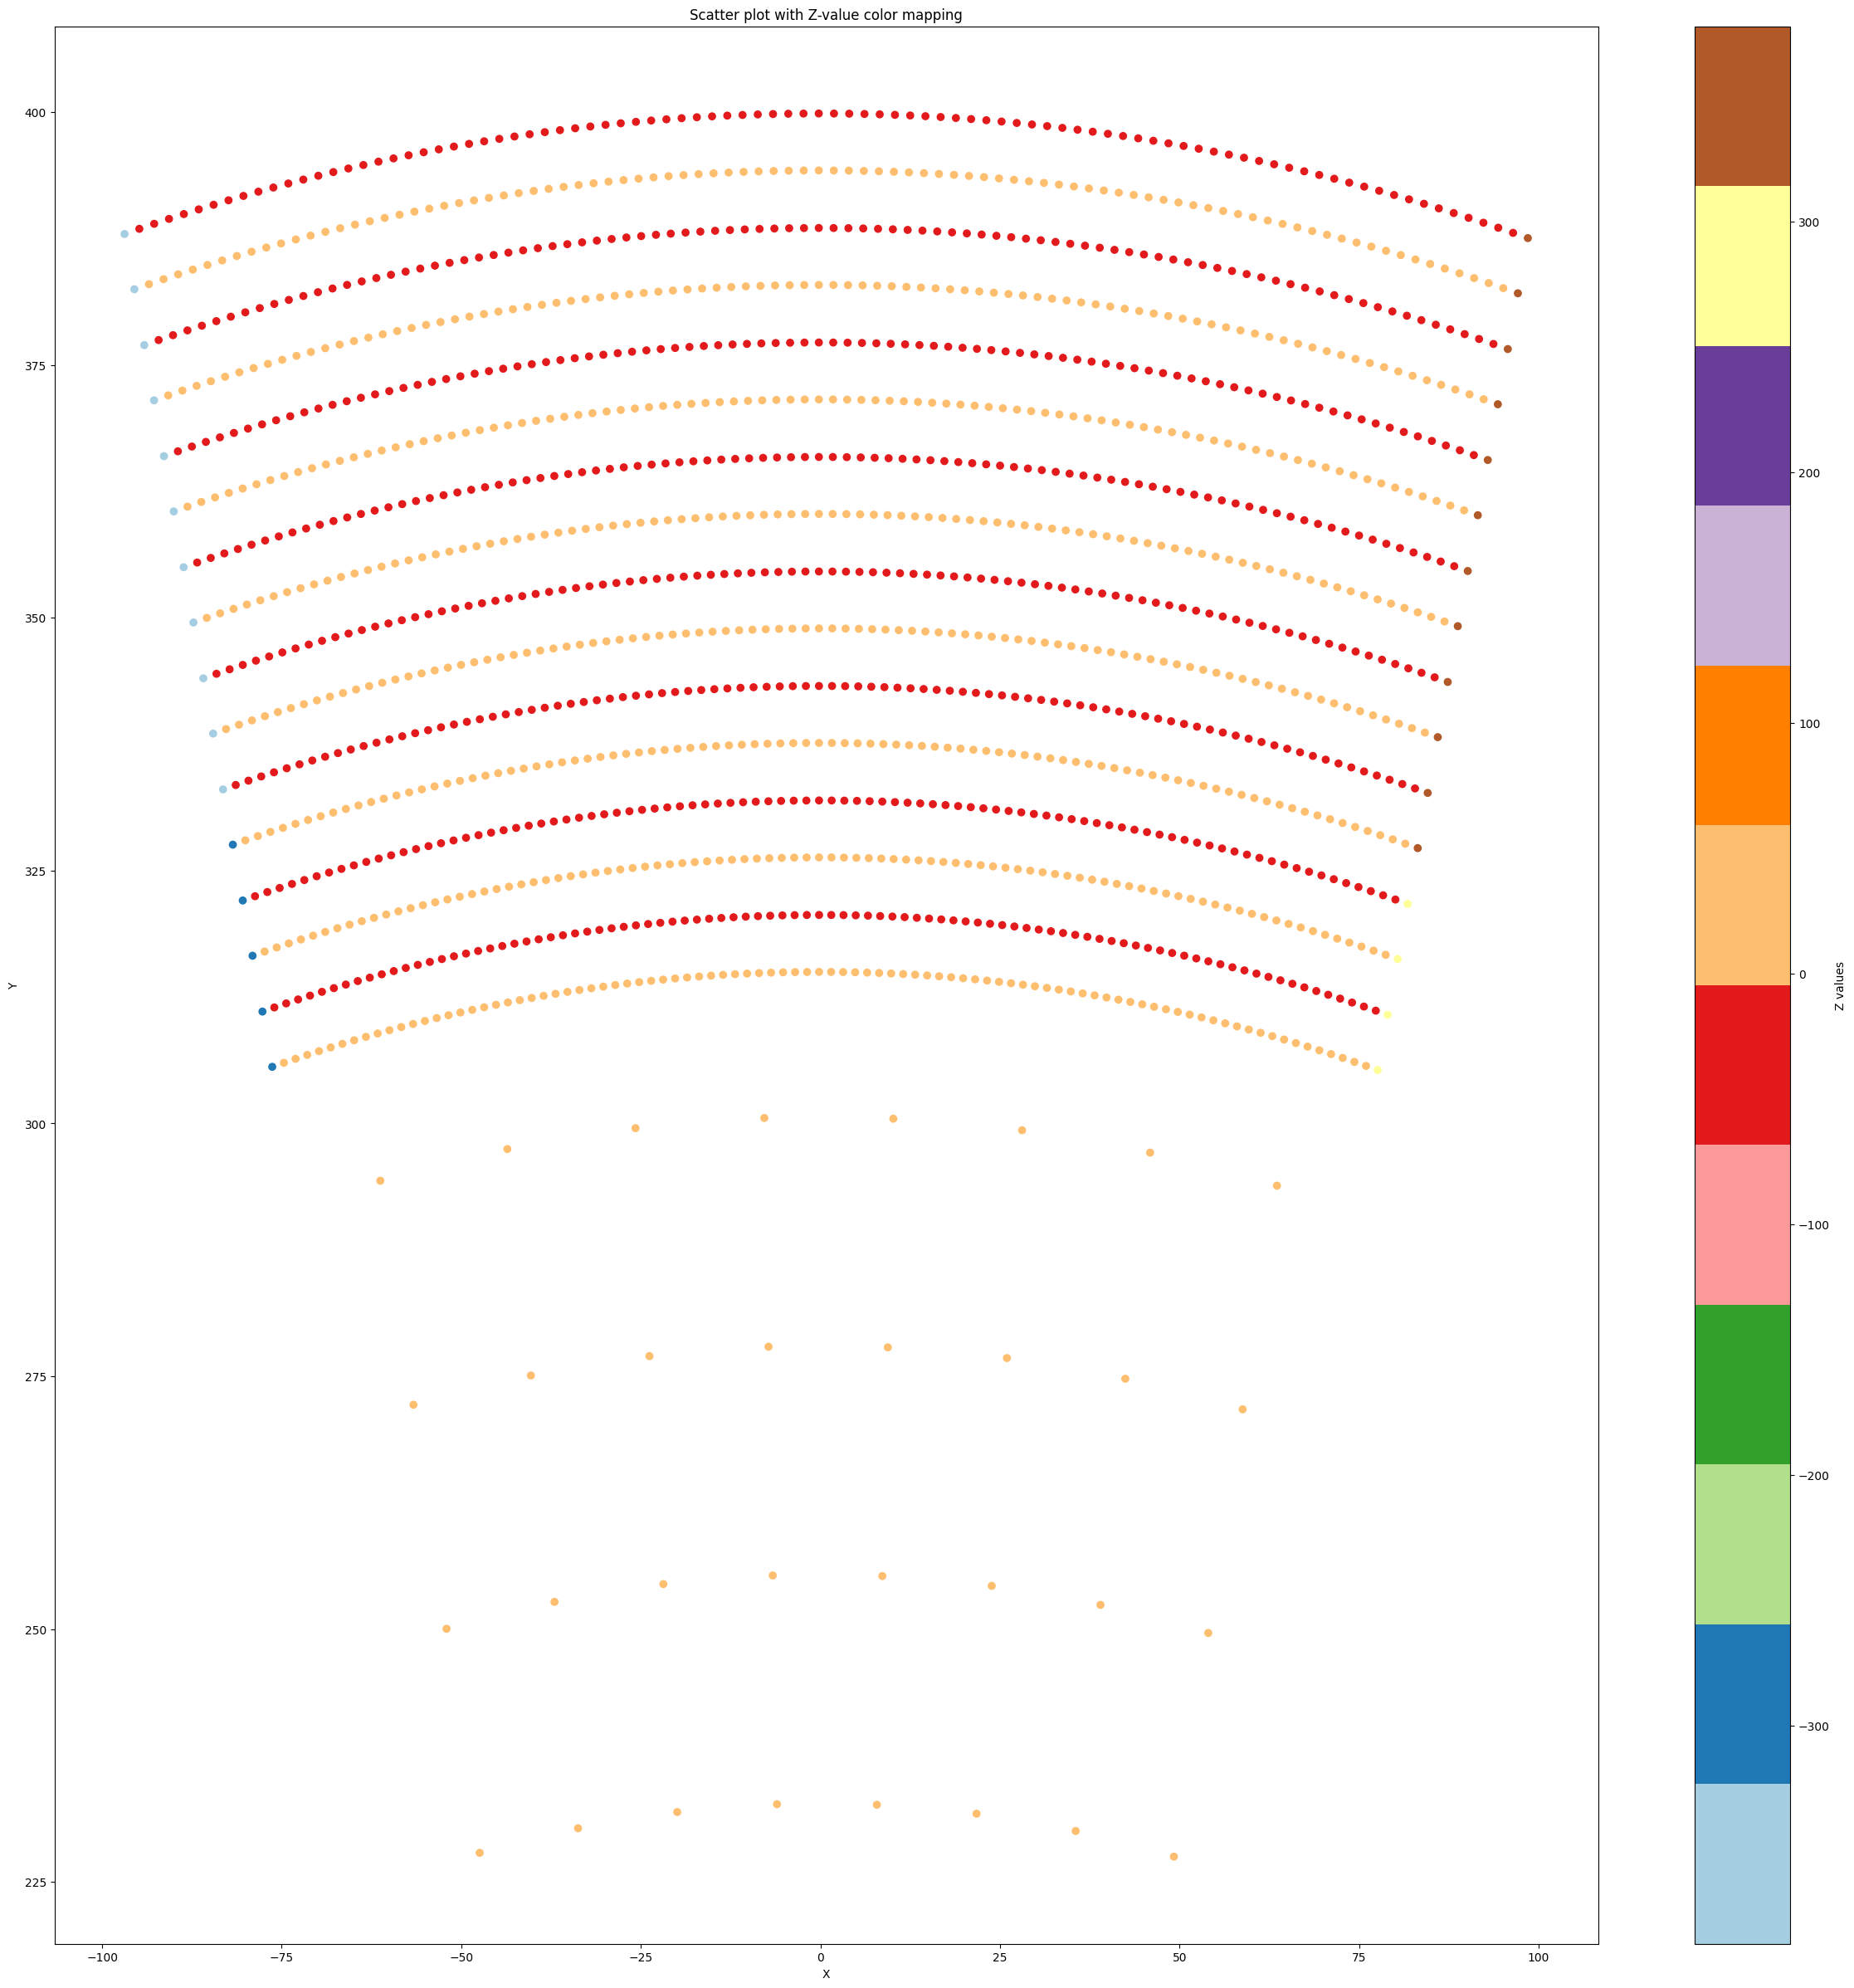

In [9]:
Draw_diff_between_old_and_new_maps(imodule = 0)

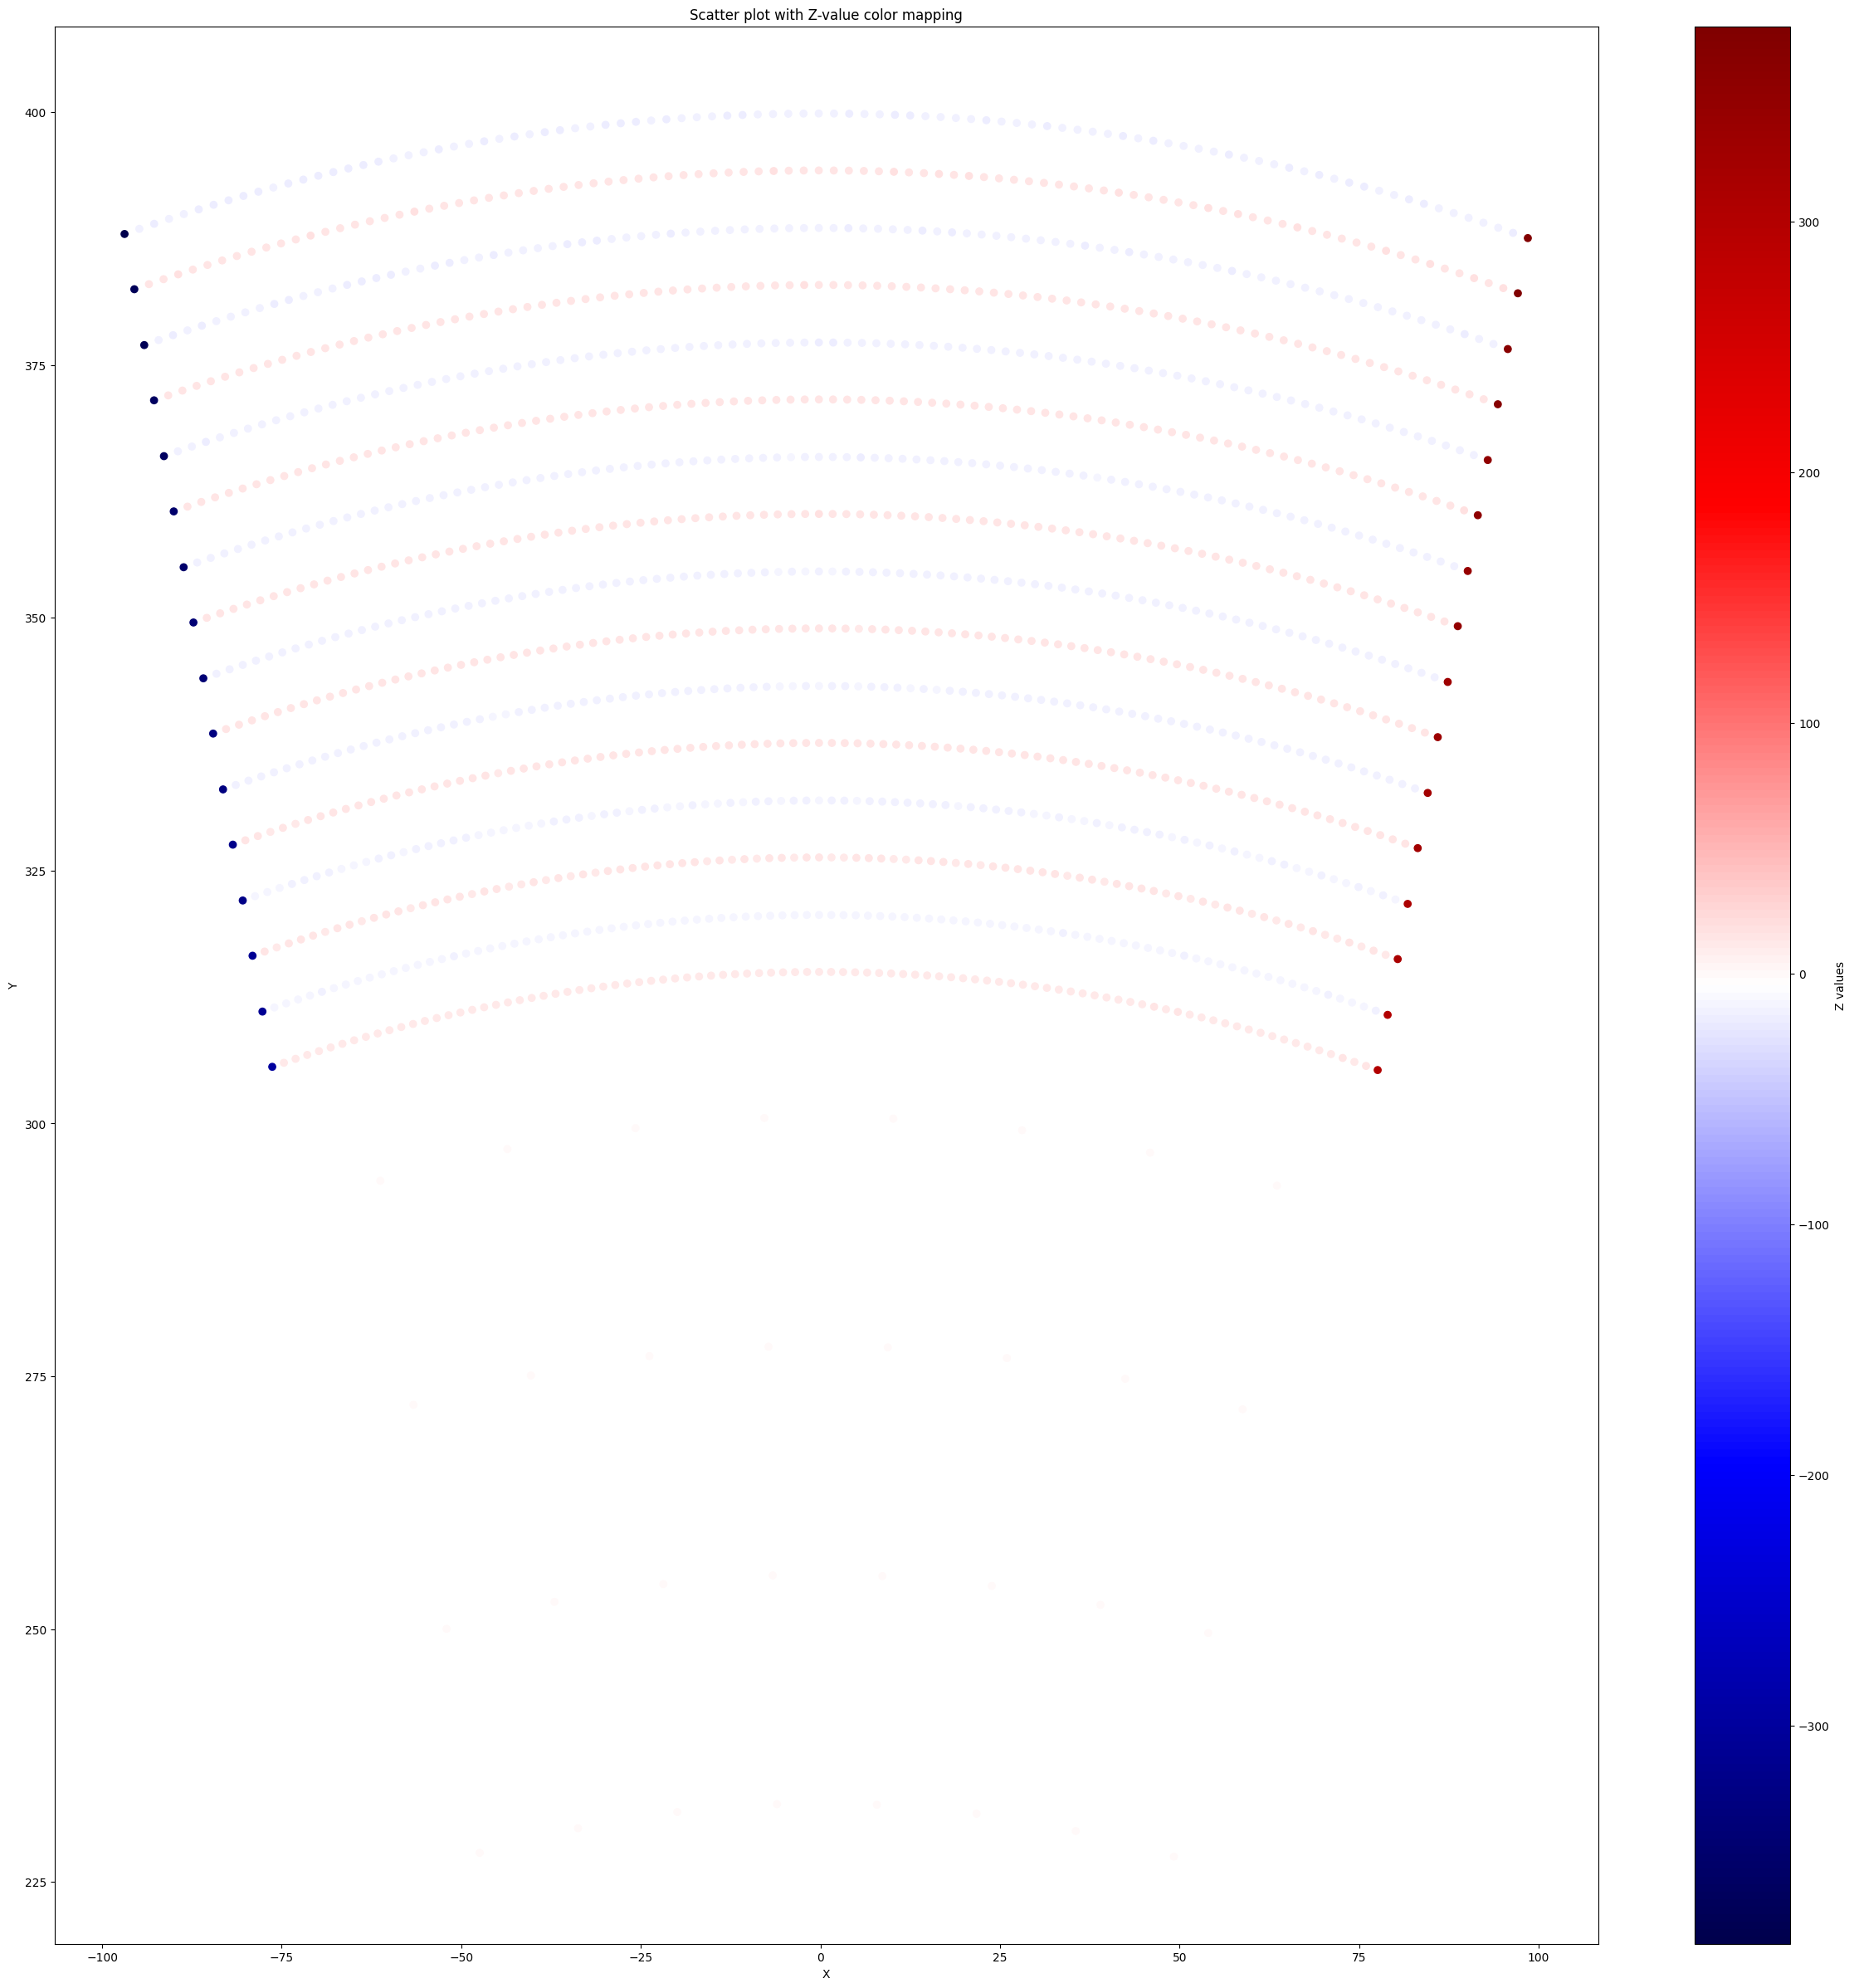

In [10]:
Draw_diff_between_old_and_new_maps(imodule = 0, scheme_name = 'seismic')

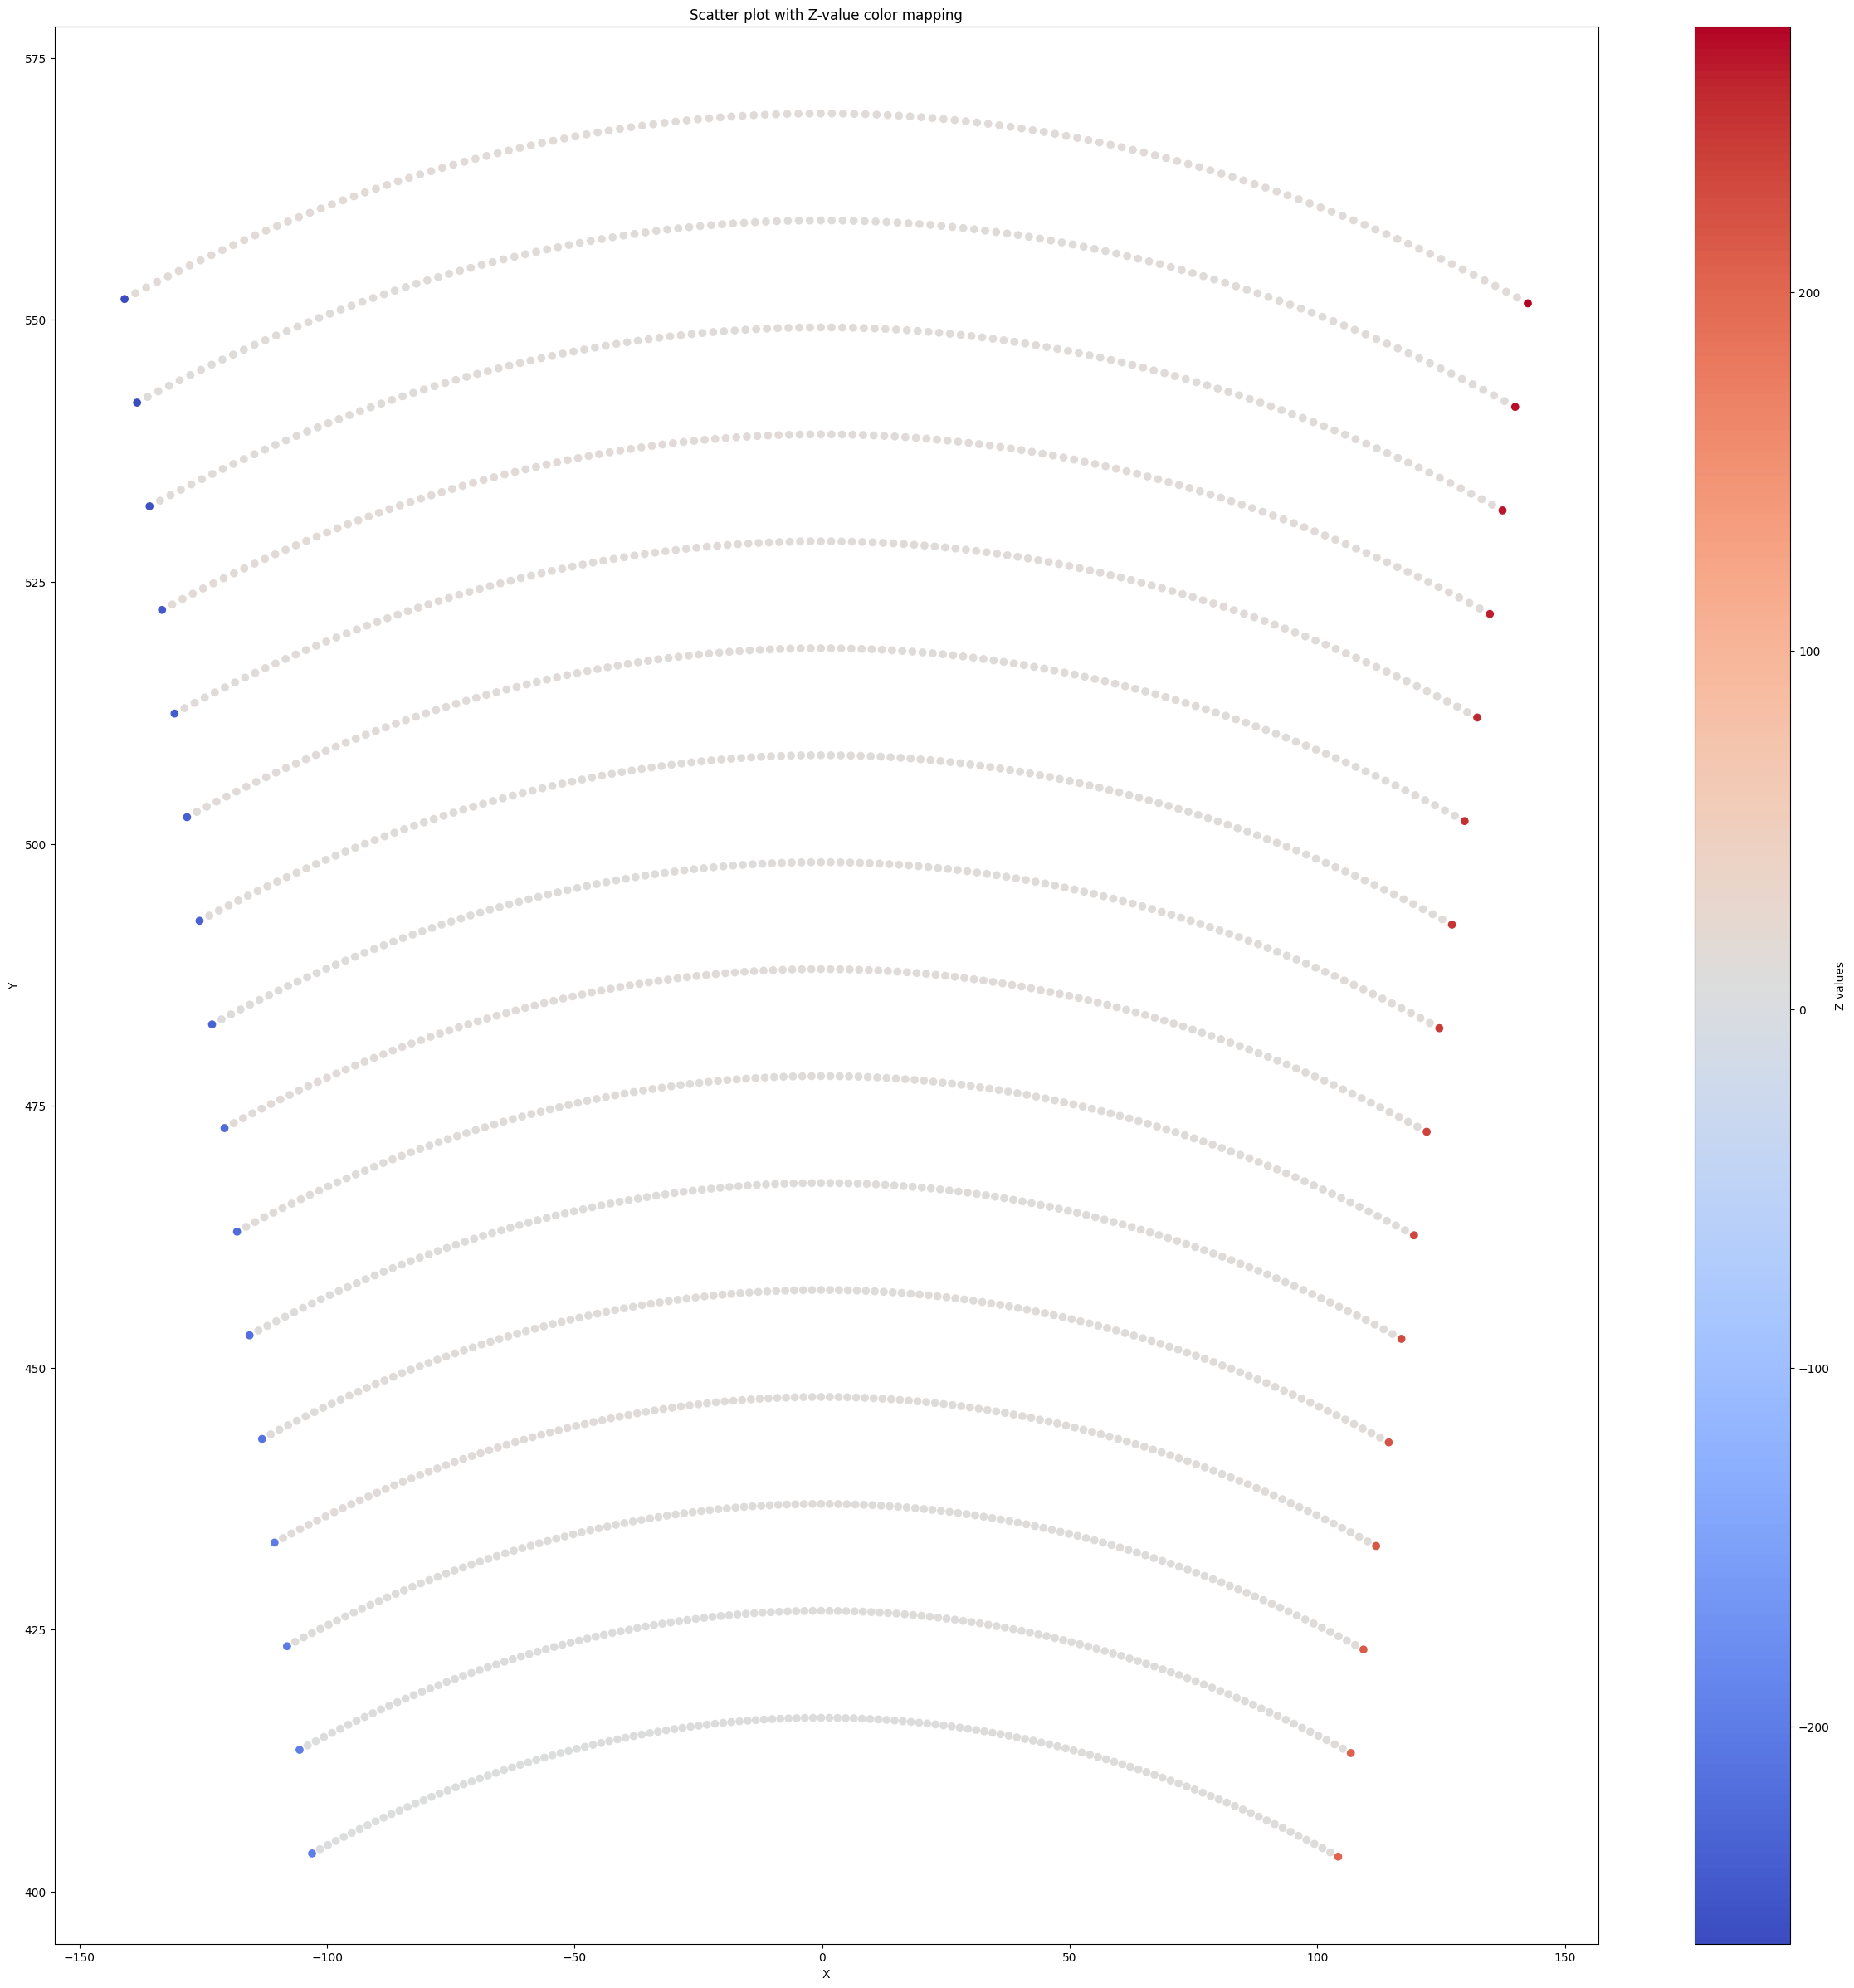

In [11]:
Draw_diff_between_old_and_new_maps(imodule = 1, scheme_name = 'coolwarm')

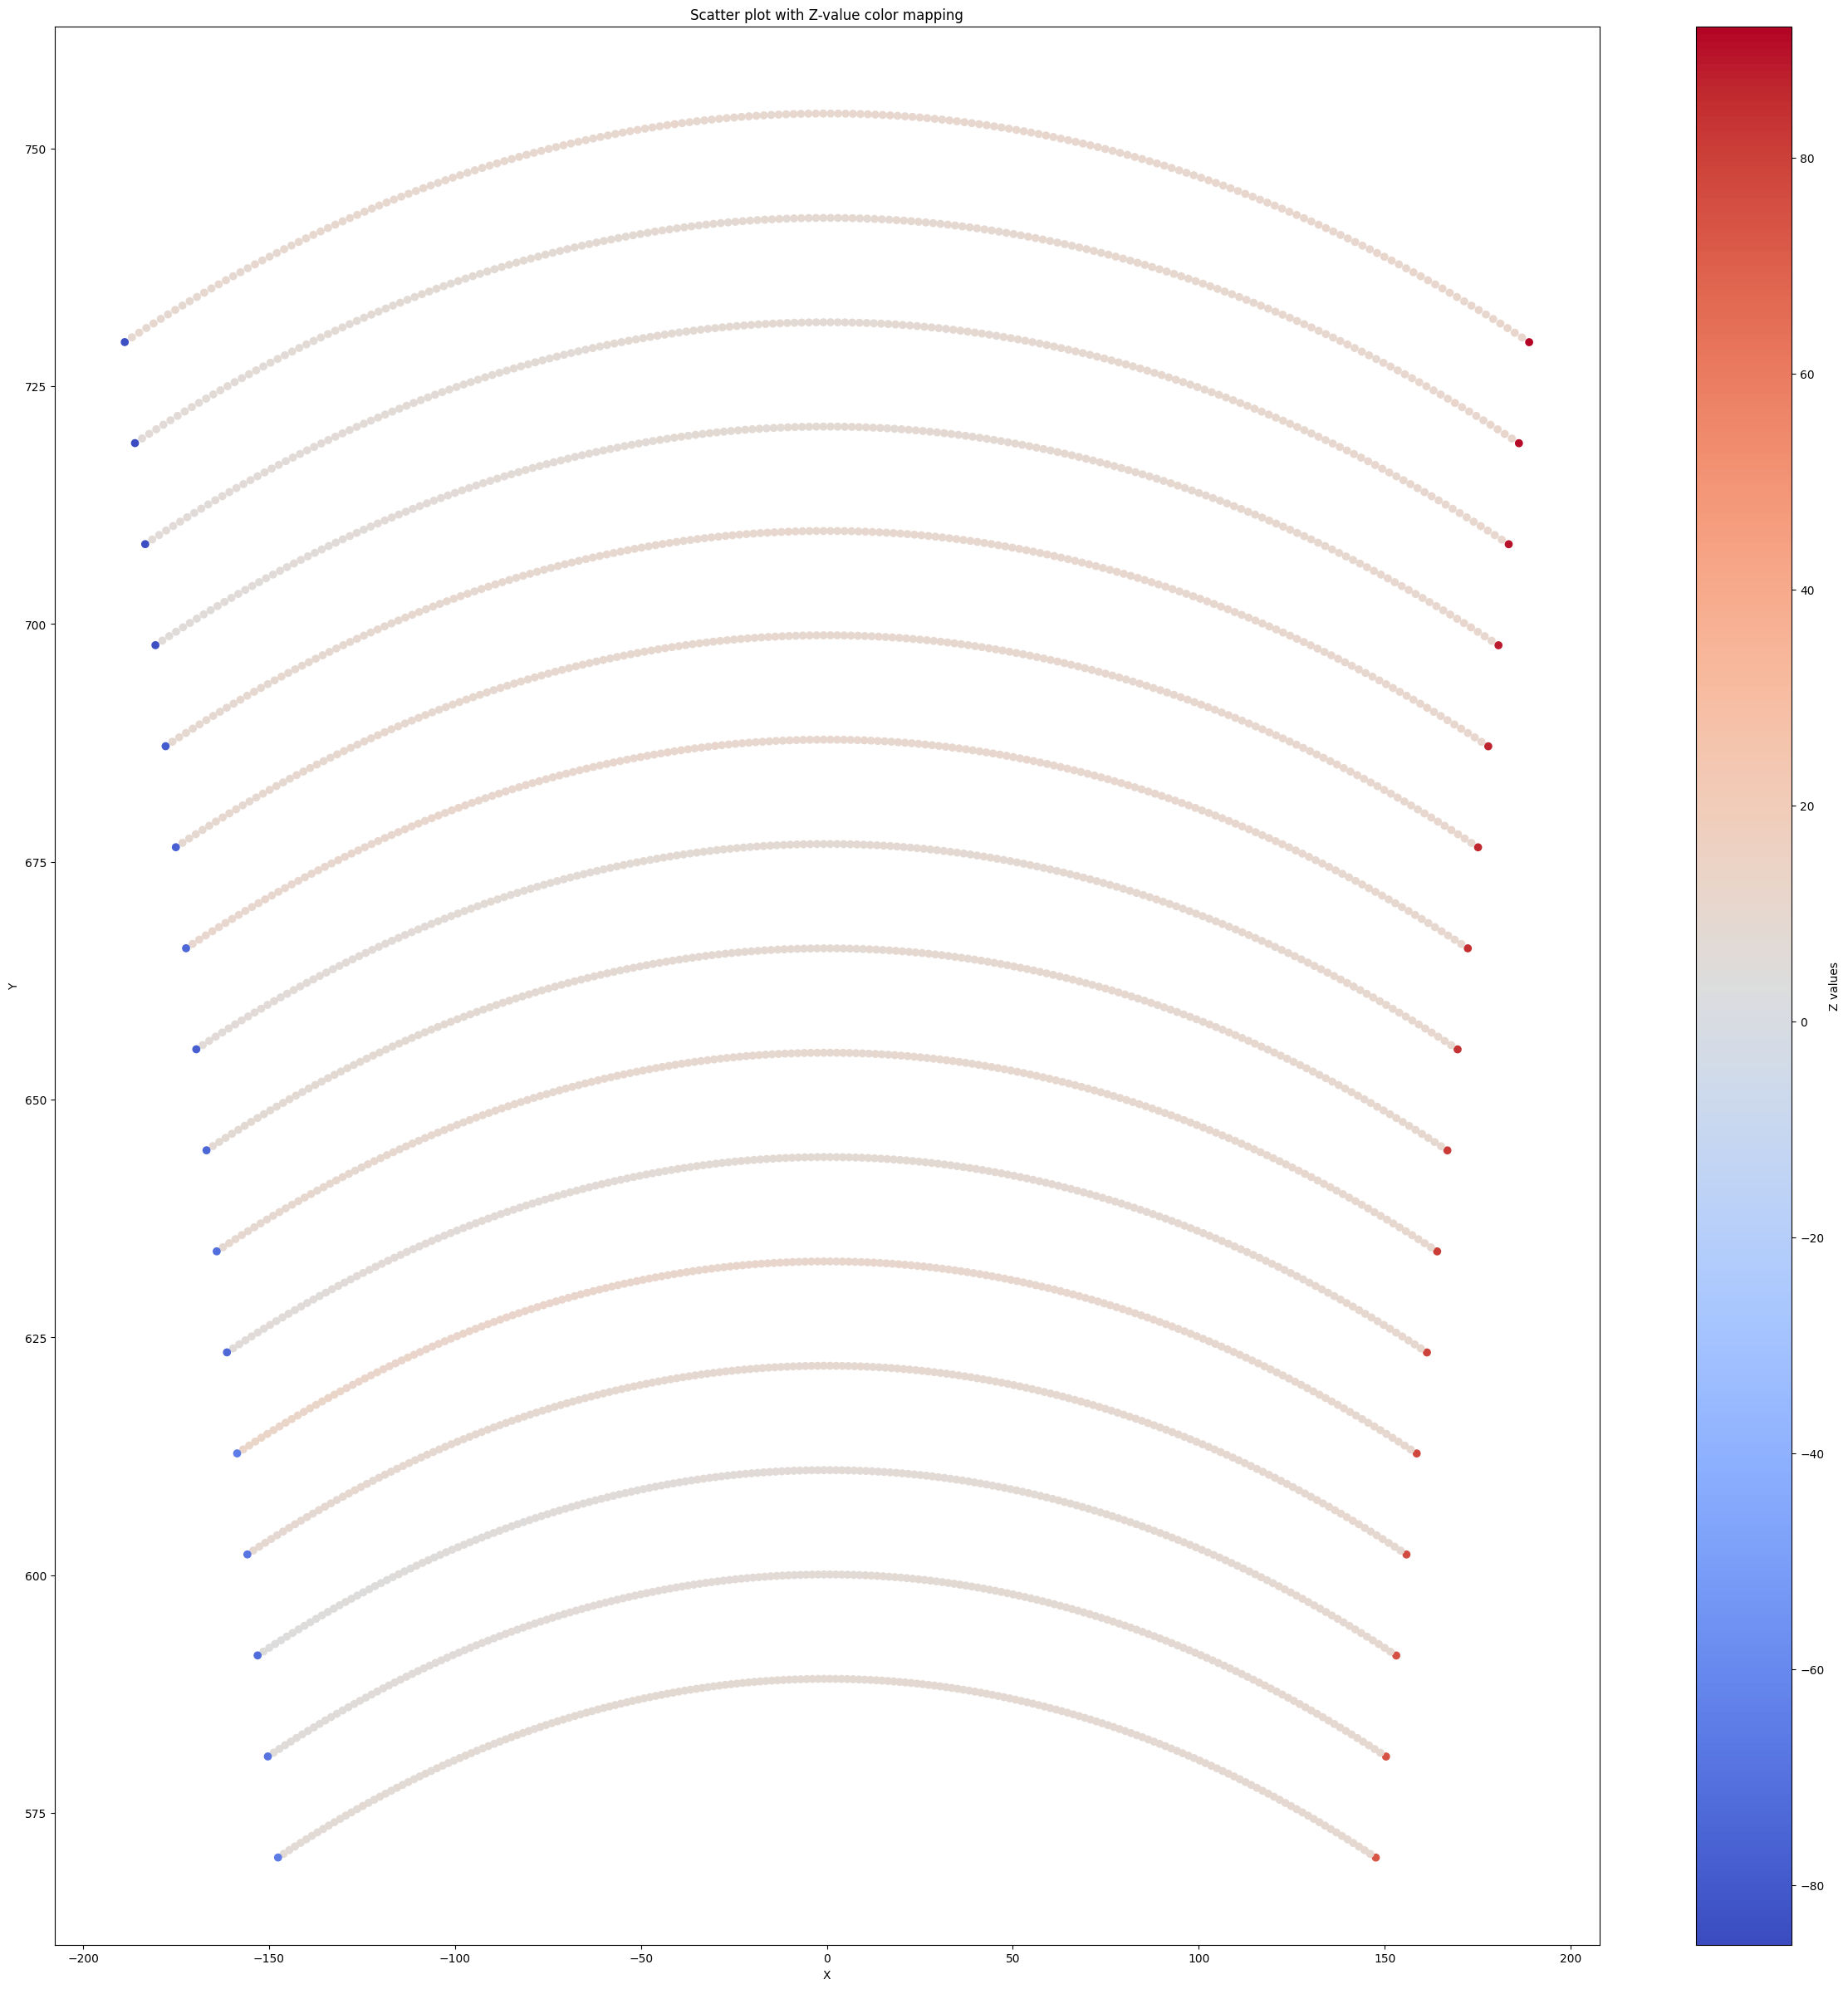

In [12]:
Draw_diff_between_old_and_new_maps(imodule = 2, scheme_name = 'coolwarm')

old_dphi = (old_map_max - old_map_min)/(n_pads - 1)
new_dphi = (new_map_max - new_map_min)/(n_pads - 1)
delta phi = old_map_min + old_dphi * int( (new_phi[i] - new_map_min)/(new_dphi) ) - new_phi[i]

In [13]:
print(1.14%1)

0.1399999999999999


In [14]:
def Draw_diff_between_soft_and_new_maps(imodule, scheme_name = "Paired"):
    n_pads = [94, 128, 192]
    X = new_df_centroids[imodule]['PadX'].to_numpy()
    Y = new_df_centroids[imodule]['PadY'].to_numpy()
    phi_new_map = new_df_centroids[imodule]['PadPhi'].to_numpy()
    phi_old_map = old_df_centroids[imodule]['PadPhi'].to_numpy()
    new_dphi = (max(phi_new_map) - min(phi_new_map))/(n_pads[imodule] - 1)
    old_dphi = (max(phi_old_map) - min(phi_old_map))/(n_pads[imodule] - 1)
    Z = min(phi_old_map) - min(phi_new_map) + (old_dphi - new_dphi) * ( (phi_new_map - min(phi_new_map))/(new_dphi) - ((phi_new_map - min(phi_new_map))/(new_dphi))%1 ) + math.pi/2.
    Z = Z*1.e3*new_df_centroids[imodule]['PadR']
    #Z = (new_df_centroids[imodule]['PadPhi'].to_numpy() - old - math.pi/2.)*1.e3*new_df_centroids[imodule]['PadR']
    
    # Create figure
    fig, ax = plt.subplots(figsize=(30, 30))
    
    # Choose twilight
    cmap = colormaps.get_cmap(scheme_name)
    
    # Normalize Z values to colormap range
    norm = plt.Normalize(vmin=np.nanmin(Z), vmax=np.nanmax(Z))
    colors = cmap(norm(Z))
    
    # Scatter plot with colors based on Z values
    scatter = ax.scatter(X, Y, c=Z, cmap=cmap)
    
    # Add colorbar
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Z values')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter plot with Z-value color mapping')
    plt.show()

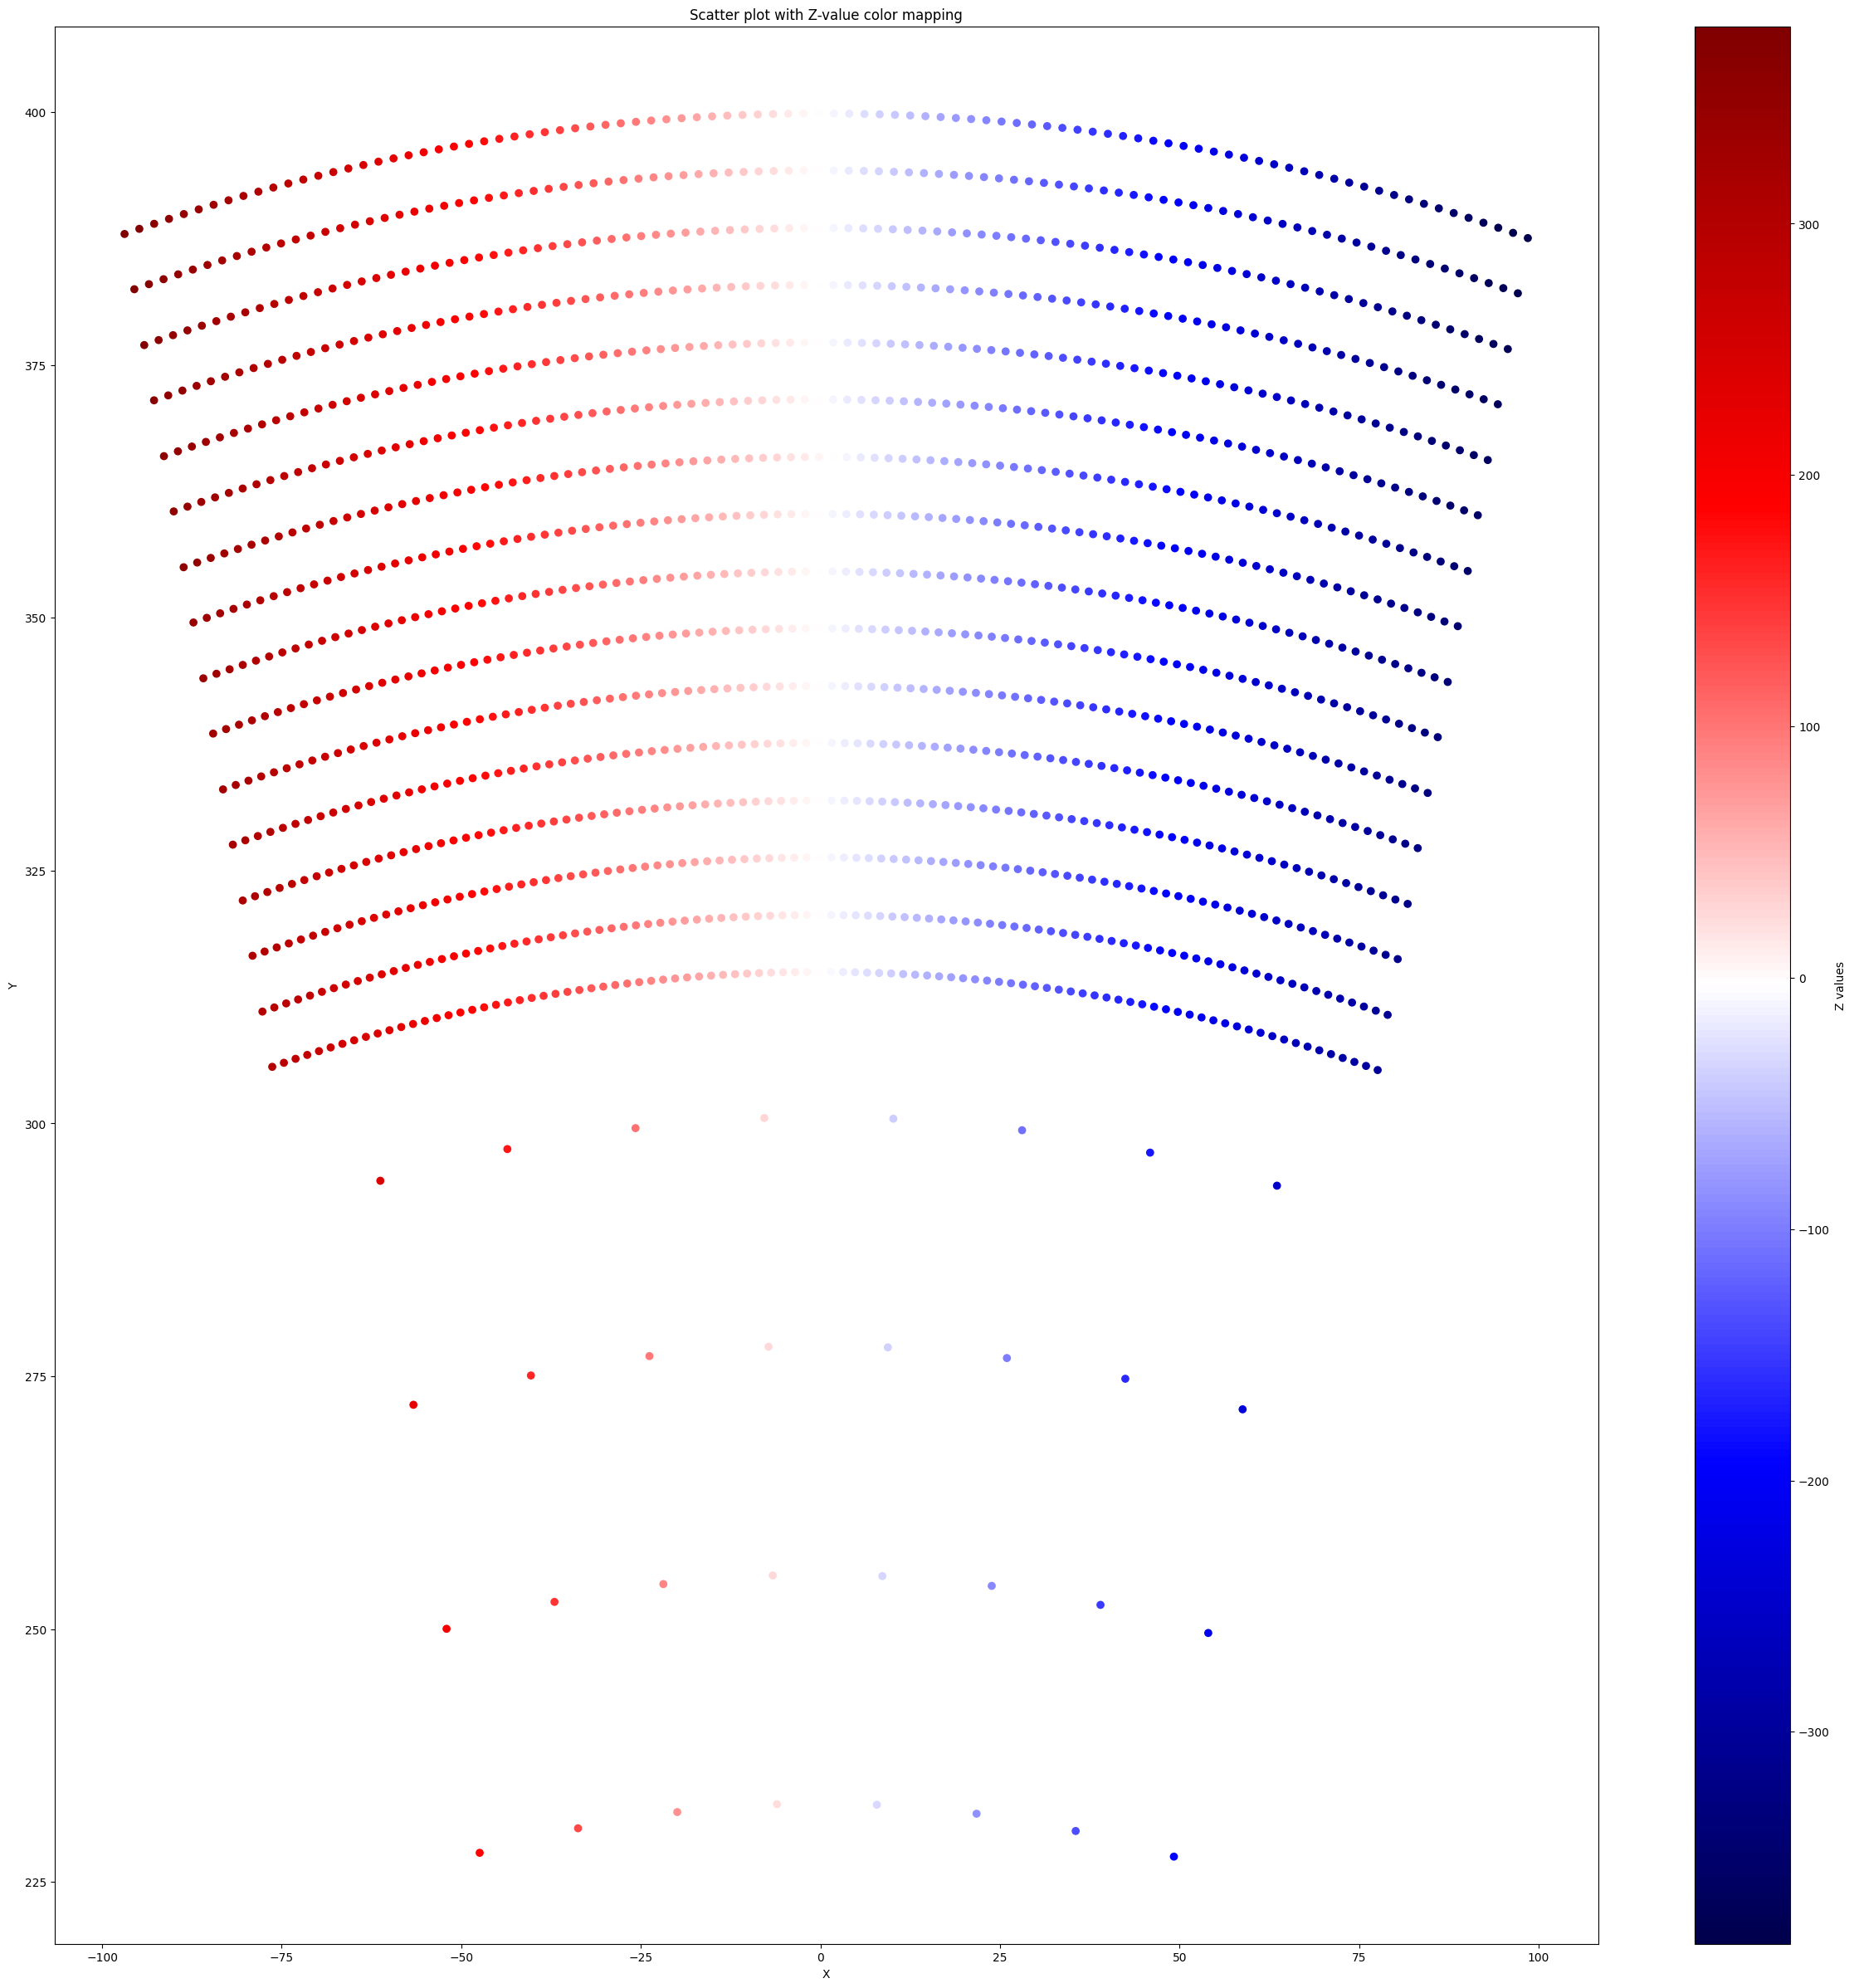

In [15]:
Draw_diff_between_soft_and_new_maps(imodule = 0, scheme_name = 'seismic')

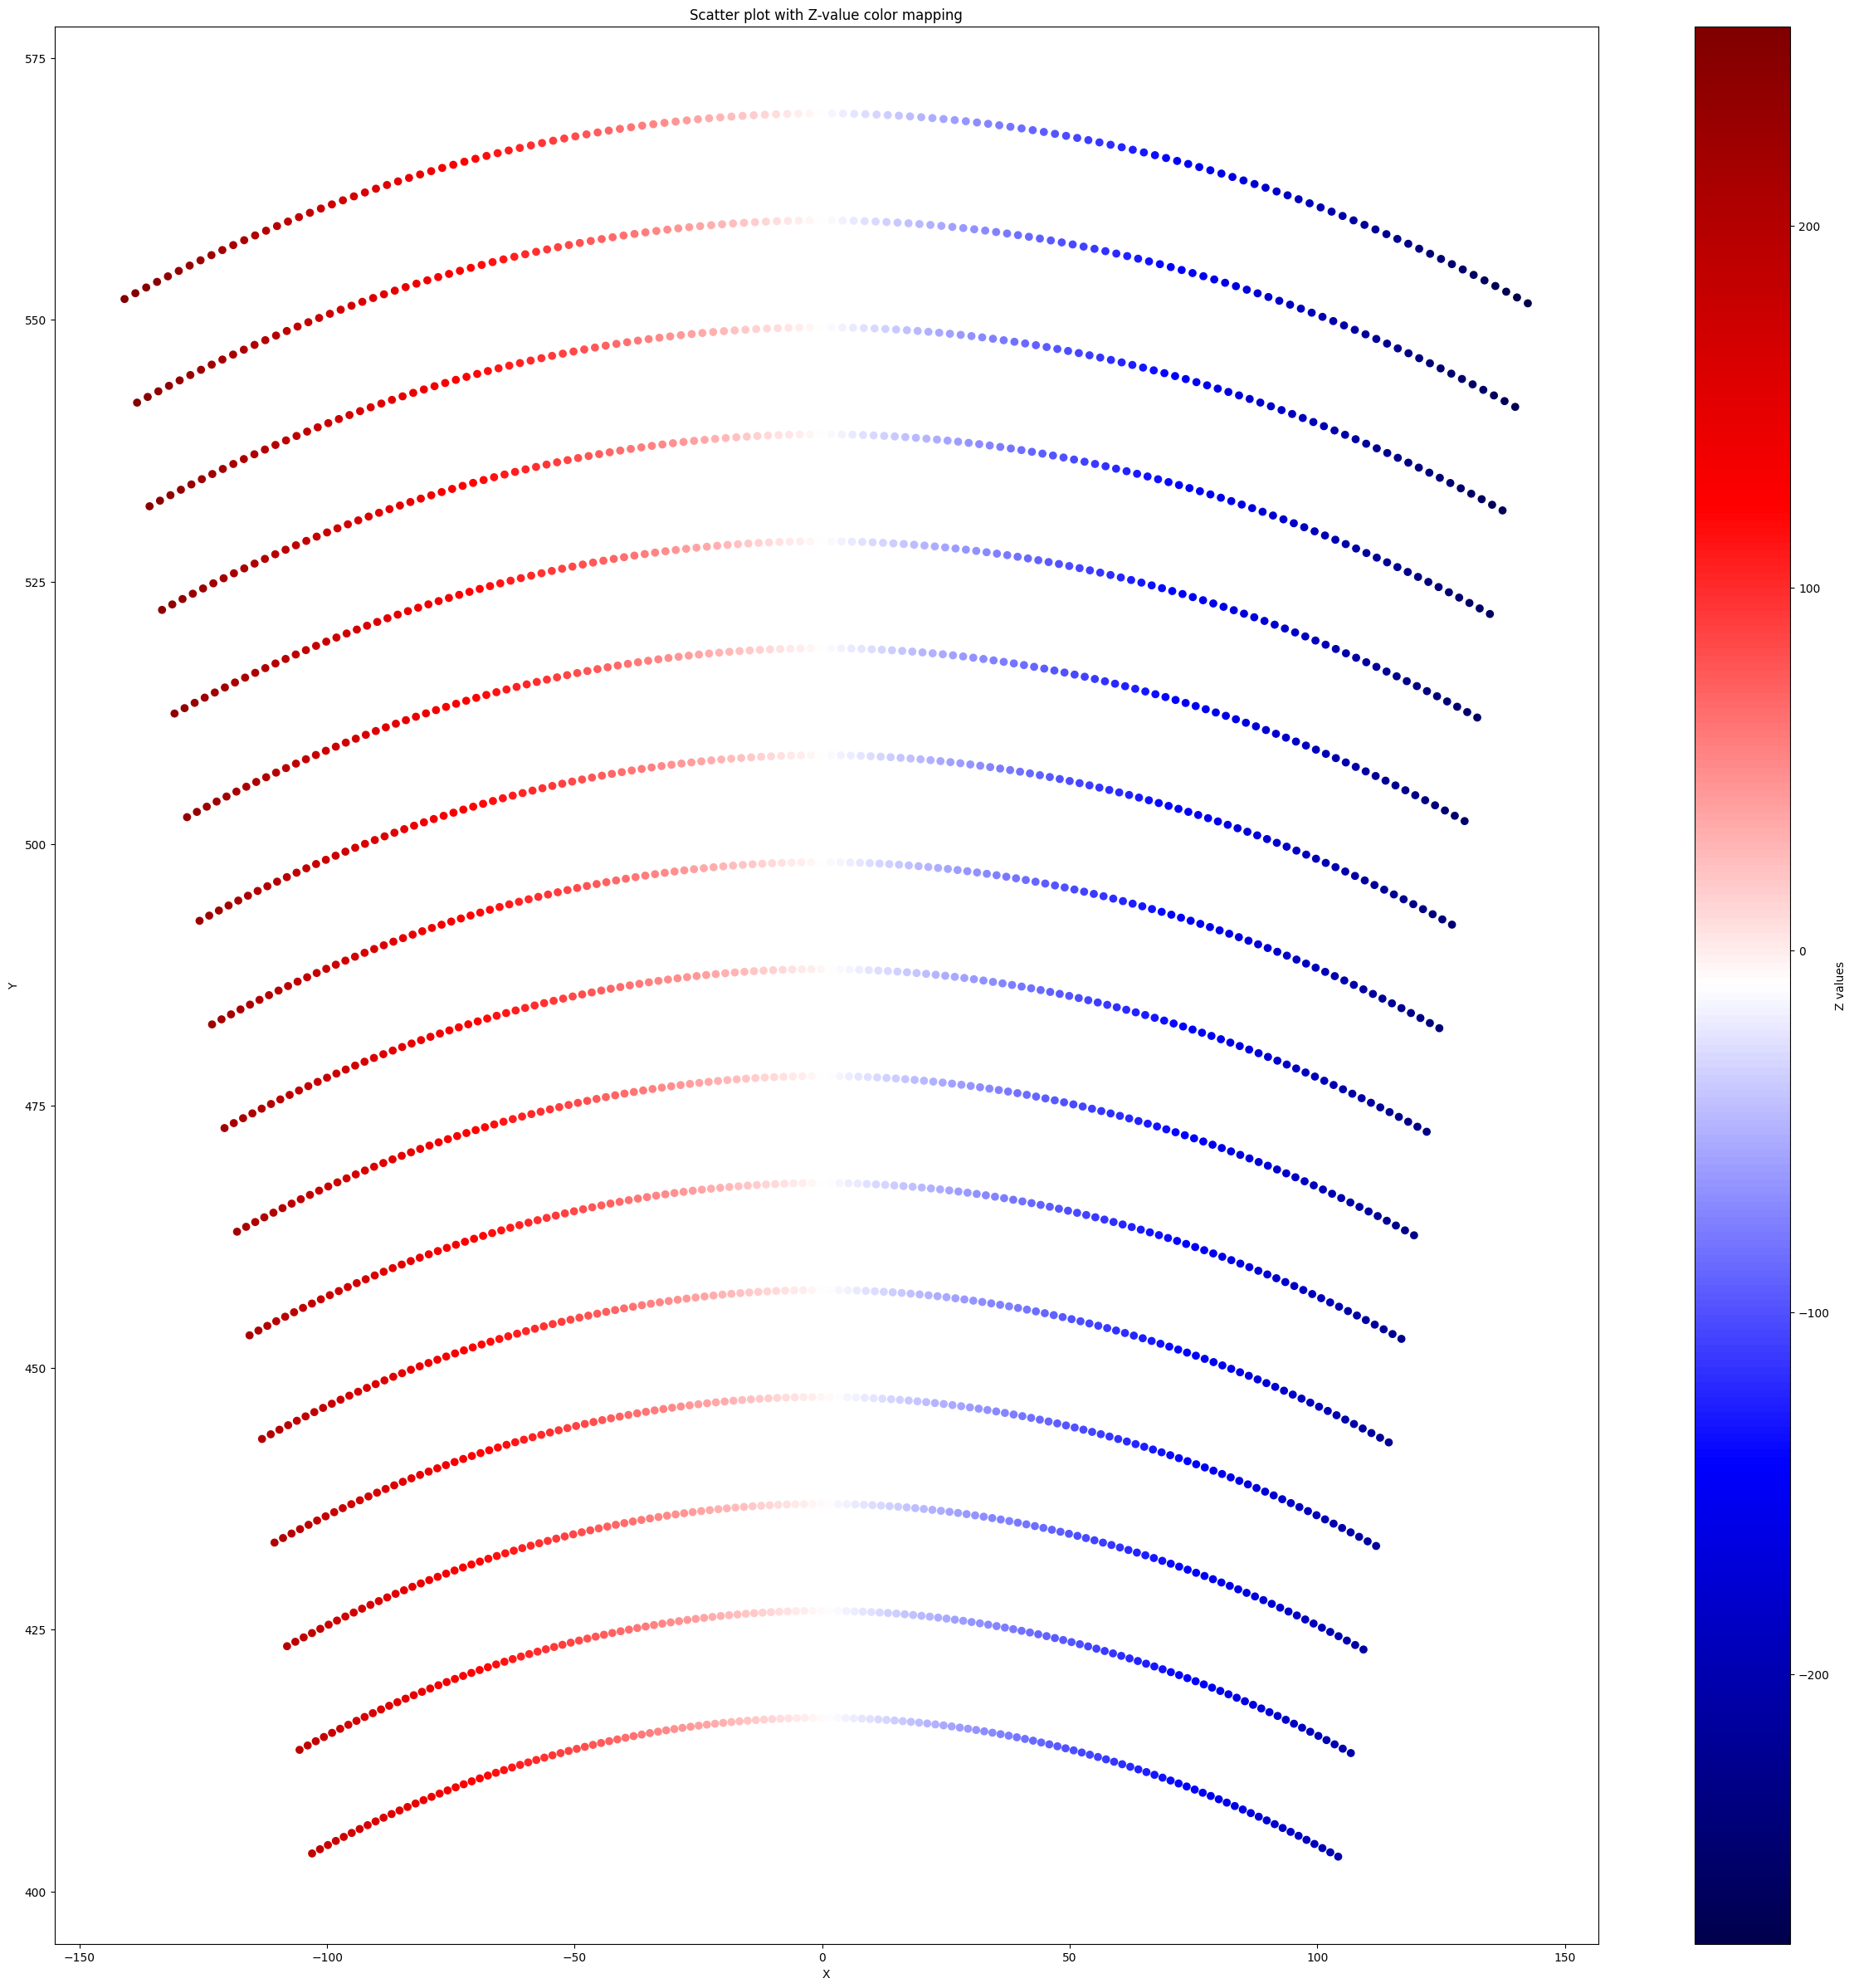

In [16]:
Draw_diff_between_soft_and_new_maps(imodule = 1, scheme_name = 'seismic')

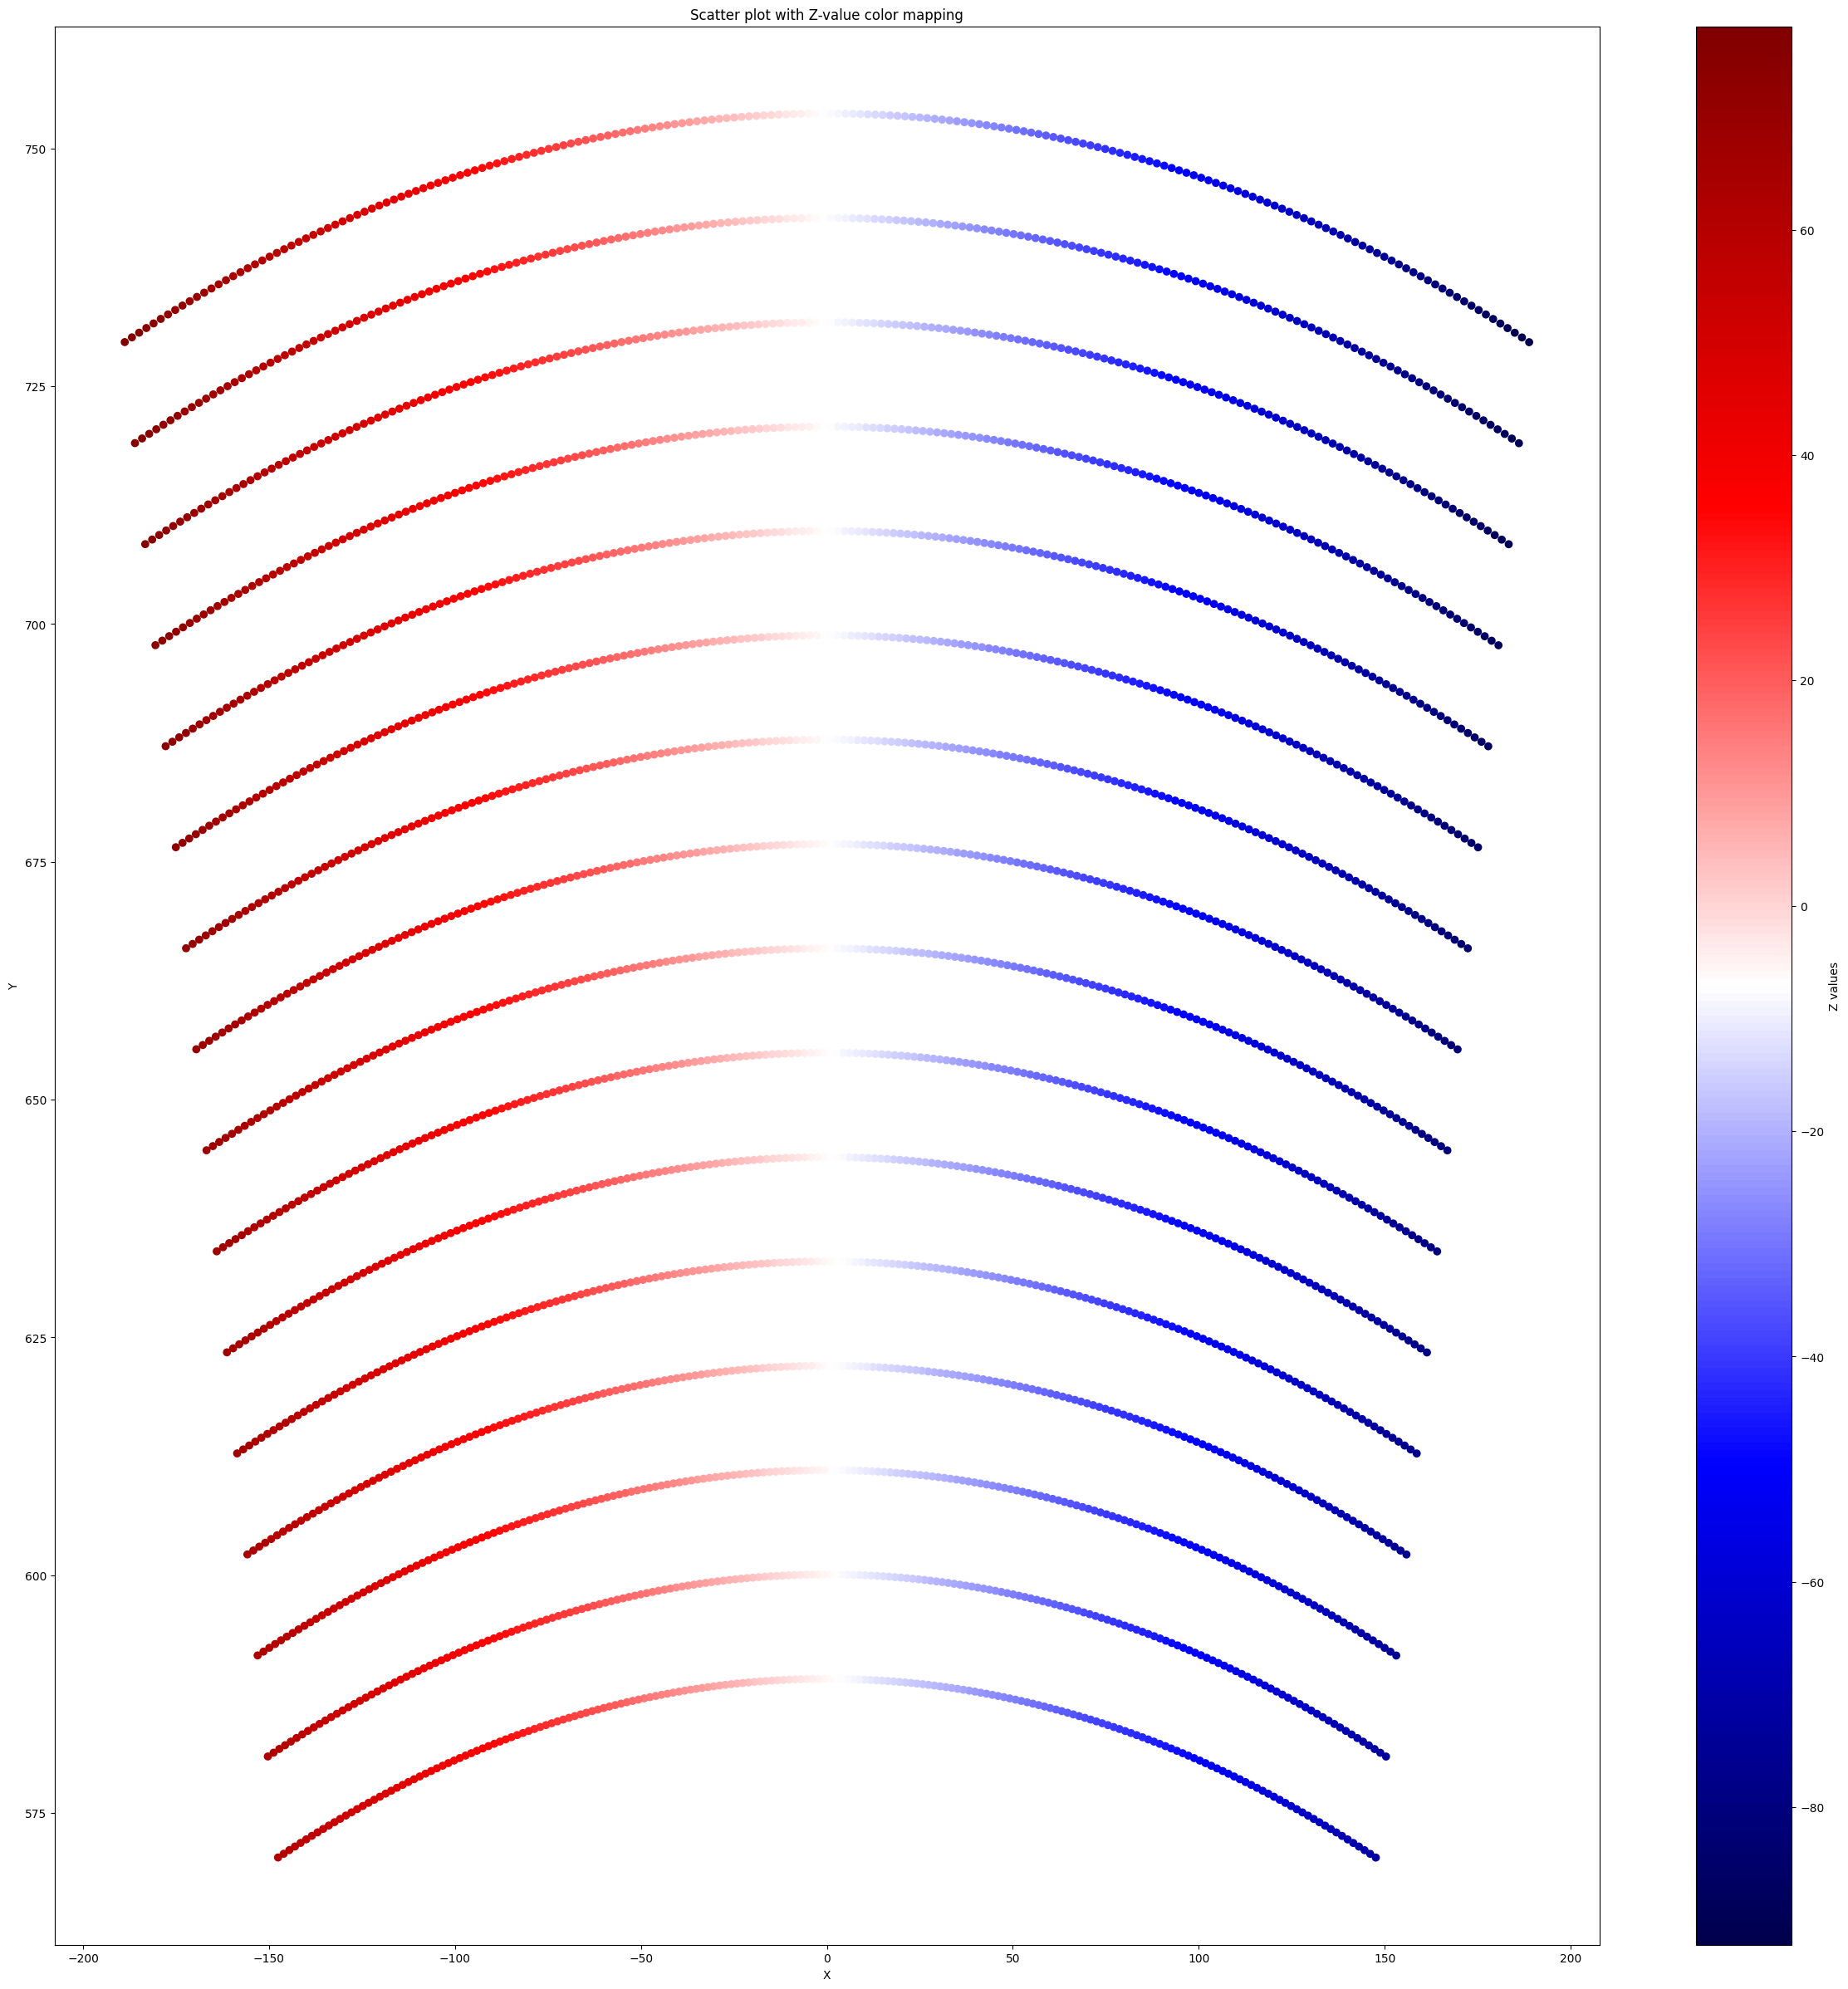

In [17]:
Draw_diff_between_soft_and_new_maps(imodule = 2, scheme_name = 'seismic')

In [18]:
def Draw_diff_between_old_and_new_maps_3D(imodule, scheme_name = "plasma"):

    X = new_df_centroids[imodule]['PadX'].to_numpy()
    Y = new_df_centroids[imodule]['PadY'].to_numpy()
    Z = (new_df_centroids[imodule]['PadPhi'].to_numpy() - old_df_centroids[imodule]['PadPhi'].to_numpy() - math.pi/2.)*1.e3*new_df_centroids[imodule]['PadR']

    df = pd.DataFrame({'X': X, 'Y': Y, 'Z': Z})
    
    fig = px.scatter_3d(df, x='X', y='Y', z='Z', color='Z', color_continuous_scale='plasma')
    fig.update_traces(marker=dict(size=5))  # Adjust marker size
    fig.update_layout(width=1000, height=600)  # 
    # Show interactive plot
    fig.show()

In [19]:
Draw_diff_between_old_and_new_maps_3D(imodule=0)

In [20]:
Draw_diff_between_old_and_new_maps_3D(imodule=1)

In [21]:
Draw_diff_between_old_and_new_maps_3D(imodule=2)

In [22]:
!jupyter nbconvert --to html TestChannelMapping.ipynb --HTMLExporter.theme=dark

[NbConvertApp] Converting notebook TestChannelMapping.ipynb to html
[NbConvertApp] Writing 9178493 bytes to TestChannelMapping.html
